# **Abstract**

**Telecom Churn Dataset**

Dataset Overview:

Link : https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

 - This dataset is designed for understanding and predicting customer retention.
 - It involves detailed analysis of customer data to create targeted programs for retaining customers.
 - This dataset contains processed data on customer activities
    (various features), accompanied by a churn indicator that denotes
    if a customer has discontinued their subscription.
 - The primary aim is to build models that can predict customer churn.



> Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models.



Each row represents a customer; each column contains the customer’s attributes. The datasets have the following attributes or features:

*   State: string
*   Account length: integer
*   Area code: integer
*   International plan: string
*   Voice mail plan: string
*   Number vmail messages: integer
*   Total day minutes: double
*   Total day calls: integer
*   Total eve minutes: double
*   Total day charge: double
*   Total eve calls: integer
*   Total eve charge: double
*   Total night minutes: double
*   Total night calls: integer
*   Total night charge: double
*   Total intl minutes: double
*   Total intl calls: integer
*   Total intl charge: double
*   Customer service calls: integer
*   Churn: string

The "Churn" column is the target to predict.















# **ML Data Cleaning and Feature Selection**

**ML Data Cleaning:**

- Data cleaning is a crucial step in the machine learning pipeline. It involves several processes to ensure the data is in a usable form for modeling. Here's a brief rundown of common tasks:

   1. Handling Missing Values: It involves identifying and imputing or removing data points or features with missing values. Techniques can range from simple methods like mean or median imputation to more complex ones like K-Nearest Neighbors or multivariate imputation.

   2. Outlier Detection and Treatment: Outliers can skew the results of a model. They can be detected using statistical tests, visualization, or machine learning methods like Isolation Forest. Once detected, they can be removed, capped, or treated to minimize their impact.

   3. Encoding Categorical Variables: Machine learning models require numerical input, so categorical variables are encoded into numerical format through methods like one-hot encoding or label encoding.

  4. Standardization and Normalization: These processes scale the data to a standard range or distribution, which is essential for many algorithms to perform well.

  5. Error Correction: This step corrects errors or inconsistencies in the data, such as spelling mistakes, incorrect labels, or wrong measurements.

**Feature Selection:**

- Feature selection is the process of identifying the most relevant features for use in model construction.
- It helps to improve a model’s performance and reduces the computational demand.
- Here’s a brief overview of common techniques:

  1. Filter Methods: These methods use statistical techniques to rank the importance of features based on their relationship with the target variable. Examples include correlation matrix and Chi-squared test.

  2. Wrapper Methods: These methods evaluate subsets of variables to determine their effectiveness. Examples include recursive feature elimination and forward feature selection.

  3. Embedded Methods: These methods perform feature selection as part of the model construction process. Examples include LASSO and Ridge regression, which include regularization parameters to penalize the inclusion of less important features.


### **What are the Key Analyses and Learning from this Assignment:**
- The overarching question was to understand which **factors contribute to customer churn** and **to develop a predictive model** that can accurately identify at-risk customers based on various features.

- To address this, the **data was first cleansed and preprocessed** to ensure it was suitable for modeling.
- This **involved encoding categorical variables, normalizing numerical features, and handling missing values**.
- Various models were trained and evaluated, with particular attention paid to the **impact of outliers on model performance**.
- **Feature selection methods were also used to identify the most predictive variables.**
- The models generally performed well, with **metrics** such as accuracy and the area under the ROC curve (AUC) indicating strong predictive capability.
- The **RandomForest Classifier**, for example, showed high accuracy, and the removal of outliers led to a slight improvement in predictive performance, especially in predicting the minority class in an imbalanced dataset.
- Several **key learnings** emerged from this analysis:
 - It was learned that features like **'Total Day Minutes' and 'Customer Service Calls** were significant predictors of churn, suggesting that service usage and customer satisfaction are critical factors.
 - The **importance of data preprocessing** was underscored, revealing that proper treatment of outliers and feature scaling can enhance model performance.
 - Finally, it was found that while **some predictors were independent**, **others exhibited multicollinearity**, highlighting the need for careful feature selection in model development.

## Data transforming, Feature creation, and Analysis:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
df = pd.read_csv('/content/churn-bigml-80.csv')

### Preliminary Data Analysis






In [ ]:
# Viewing data in the file
df.head(5)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

1. **What are the data types? (Only numeric and categorical)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

**2. Checking if any data is missing**

In [ ]:
# checking if the any data is missing
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## Data Cleaning and Preprocessing


In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
#Rename columns
df = df.rename(columns={'Account length':'Account_Length','Area code' : 'Area_Code',
                   'International plan' : 'International_Plan','Voice mail plan': 'Voice_Mail_Plan',
                   'Number vmail messages' : 'Number_Vmail_Messages',
                   'Total day minutes': 'Total_Day_Mins', 'Total day calls' : 'Total_Day_Calls',
                   'Total day charge' : 'Total_Day_Charge', 'Total eve minutes' : 'Total_Eve_Mins', 'Total eve calls' : 'Total_Eve_Calls',
                   'Total eve charge' : 'Total_Eve_Charge', 'Total night minutes' : 'Total_Night_Mins',
                   'Total night calls' : 'Total_Night_Calls', 'Total night charge' : 'Total_Night_Charge',
                   'Total intl minutes': 'Total_Intl_Mins','Total intl calls' : 'Total_Intl_Calls',
                   'Total intl charge' : 'Total_Intl_Charge', 'Customer service calls' : 'Customer_Service_Calls'})

In [ ]:
df = df.drop(['Total_Day_Charge', 'Total_Eve_Charge', 'Total_Night_Charge', 'Total_Intl_Charge'], axis=1)

In [ ]:
df.head(5)

State  Account_Length  Area_Code International_Plan Voice_Mail_Plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number_Vmail_Messages  Total_Day_Mins  Total_Day_Calls  Total_Eve_Mins  \
0                     25           265.1              110           197.4   
1                     26           161.6              123           195.5   
2                      0           243.4              114           121.2   
3                      0           299.4               71            61.9   
4                      0           166.7              113           148.3   

   Total_Eve_Calls  Total_Night_Mins  Total_Night_Calls  Total_Intl_Mins  \
0               99             244.7                 91             10.0   
1              103             254.4                103             13.7   
2              110             162.6                104             12.2   
3               88             196.9                 89              6.6   
4              122             186.9                121             10.1   

   Total_Intl_Calls  Customer_Service_Calls  Churn  
0                 3                       1  False  
1                 3                       1  False  
2                 5                       0  False  
3                 7                       2  False  
4                 3                       3  False

In [ ]:
#Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Length: 2666, dtype: bool

In [ ]:
#Handling Categorical Data
df['International_Plan'] = df['International_Plan'].map({'Yes': 1, 'No': 0})
df['Voice_Mail_Plan'] = df['Voice_Mail_Plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({False: 0, True: 1})

In [ ]:
encoder = ce.BinaryEncoder(cols=['State'])

In [ ]:
df_binary = encoder.fit_transform(df['State'])

In [ ]:
df = pd.concat([df.drop('State', axis=1), df_binary], axis=1)

In [ ]:
df.head(5)

Account_Length  Area_Code  International_Plan  Voice_Mail_Plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number_Vmail_Messages  Total_Day_Mins  Total_Day_Calls  Total_Eve_Mins  \
0                     25           265.1              110           197.4   
1                     26           161.6              123           195.5   
2                      0           243.4              114           121.2   
3                      0           299.4               71            61.9   
4                      0           166.7              113           148.3   

   Total_Eve_Calls  Total_Night_Mins  ...  Total_Intl_Mins  Total_Intl_Calls  \
0               99             244.7  ...             10.0                 3   
1              103             254.4  ...             13.7                 3   
2              110             162.6  ...             12.2                 5   
3               88             196.9  ...              6.6                 7   
4              122             186.9  ...             10.1                 3   

   Customer_Service_Calls  Churn  State_0  State_1  State_2  State_3  State_4  \
0                       1      0        0        0        0        0        0   
1                       1      0        0        0        0        0        1   
2                       0      0        0        0        0        0        1   
3                       2      0        0        0        0        0        1   
4                       3      0        0        0        0        1        0   

   State_5  
0        1  
1        0  
2        1  
3        0  
4        0  

[5 rows x 21 columns]

In [ ]:
df.describe()

Account_Length    Area_Code  International_Plan  Voice_Mail_Plan  \
count     2666.000000  2666.000000         2666.000000      2666.000000   
mean       100.620405   437.438860            0.101275         0.274944   
std         39.563974    42.521018            0.301750         0.446570   
min          1.000000   408.000000            0.000000         0.000000   
25%         73.000000   408.000000            0.000000         0.000000   
50%        100.000000   415.000000            0.000000         0.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       Number_Vmail_Messages  Total_Day_Mins  Total_Day_Calls  Total_Eve_Mins  \
count            2666.000000      2666.00000      2666.000000     2666.000000   
mean                8.021755       179.48162       100.310203      200.386159   
std                13.612277        54.21035        19.988162       50.951515   
min                 0.000000         0.00000         0.000000        0.000000   
25%                 0.000000       143.40000        87.000000      165.300000   
50%                 0.000000       179.95000       101.000000      200.900000   
75%                19.000000       215.90000       114.000000      235.100000   
max                50.000000       350.80000       160.000000      363.700000   

       Total_Eve_Calls  Total_Night_Mins  ...  Total_Intl_Mins  \
count      2666.000000       2666.000000  ...      2666.000000   
mean        100.023631        201.168942  ...        10.237022   
std          20.161445         50.780323  ...         2.788349   
min           0.000000         43.700000  ...         0.000000   
25%          87.000000        166.925000  ...         8.500000   
50%         100.000000        201.150000  ...        10.200000   
75%         114.000000        236.475000  ...        12.100000   
max         170.000000        395.000000  ...        20.000000   

       Total_Intl_Calls  Customer_Service_Calls        Churn      State_0  \
count       2666.000000             2666.000000  2666.000000  2666.000000   
mean           4.467367                1.562641     0.145536     0.373593   
std            2.456195                1.311236     0.352707     0.483848   
min            0.000000                0.000000     0.000000     0.000000   
25%            3.000000                1.000000     0.000000     0.000000   
50%            4.000000                1.000000     0.000000     0.000000   
75%            6.000000                2.000000     0.000000     1.000000   
max           20.000000                9.000000     1.000000     1.000000   

           State_1      State_2      State_3      State_4      State_5  
count  2666.000000  2666.000000  2666.000000  2666.000000  2666.000000  
mean      0.375844     0.483871     0.484621     0.490248     0.507127  
std       0.484431     0.499834     0.499857     0.499999     0.500043  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     1.000000  
75%       1.000000     1.000000     1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 21 columns]

## Exploratory Data Analysis (EDA)

**3. What are the likely distributions of the numeric variables?**

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Histogram Plot -

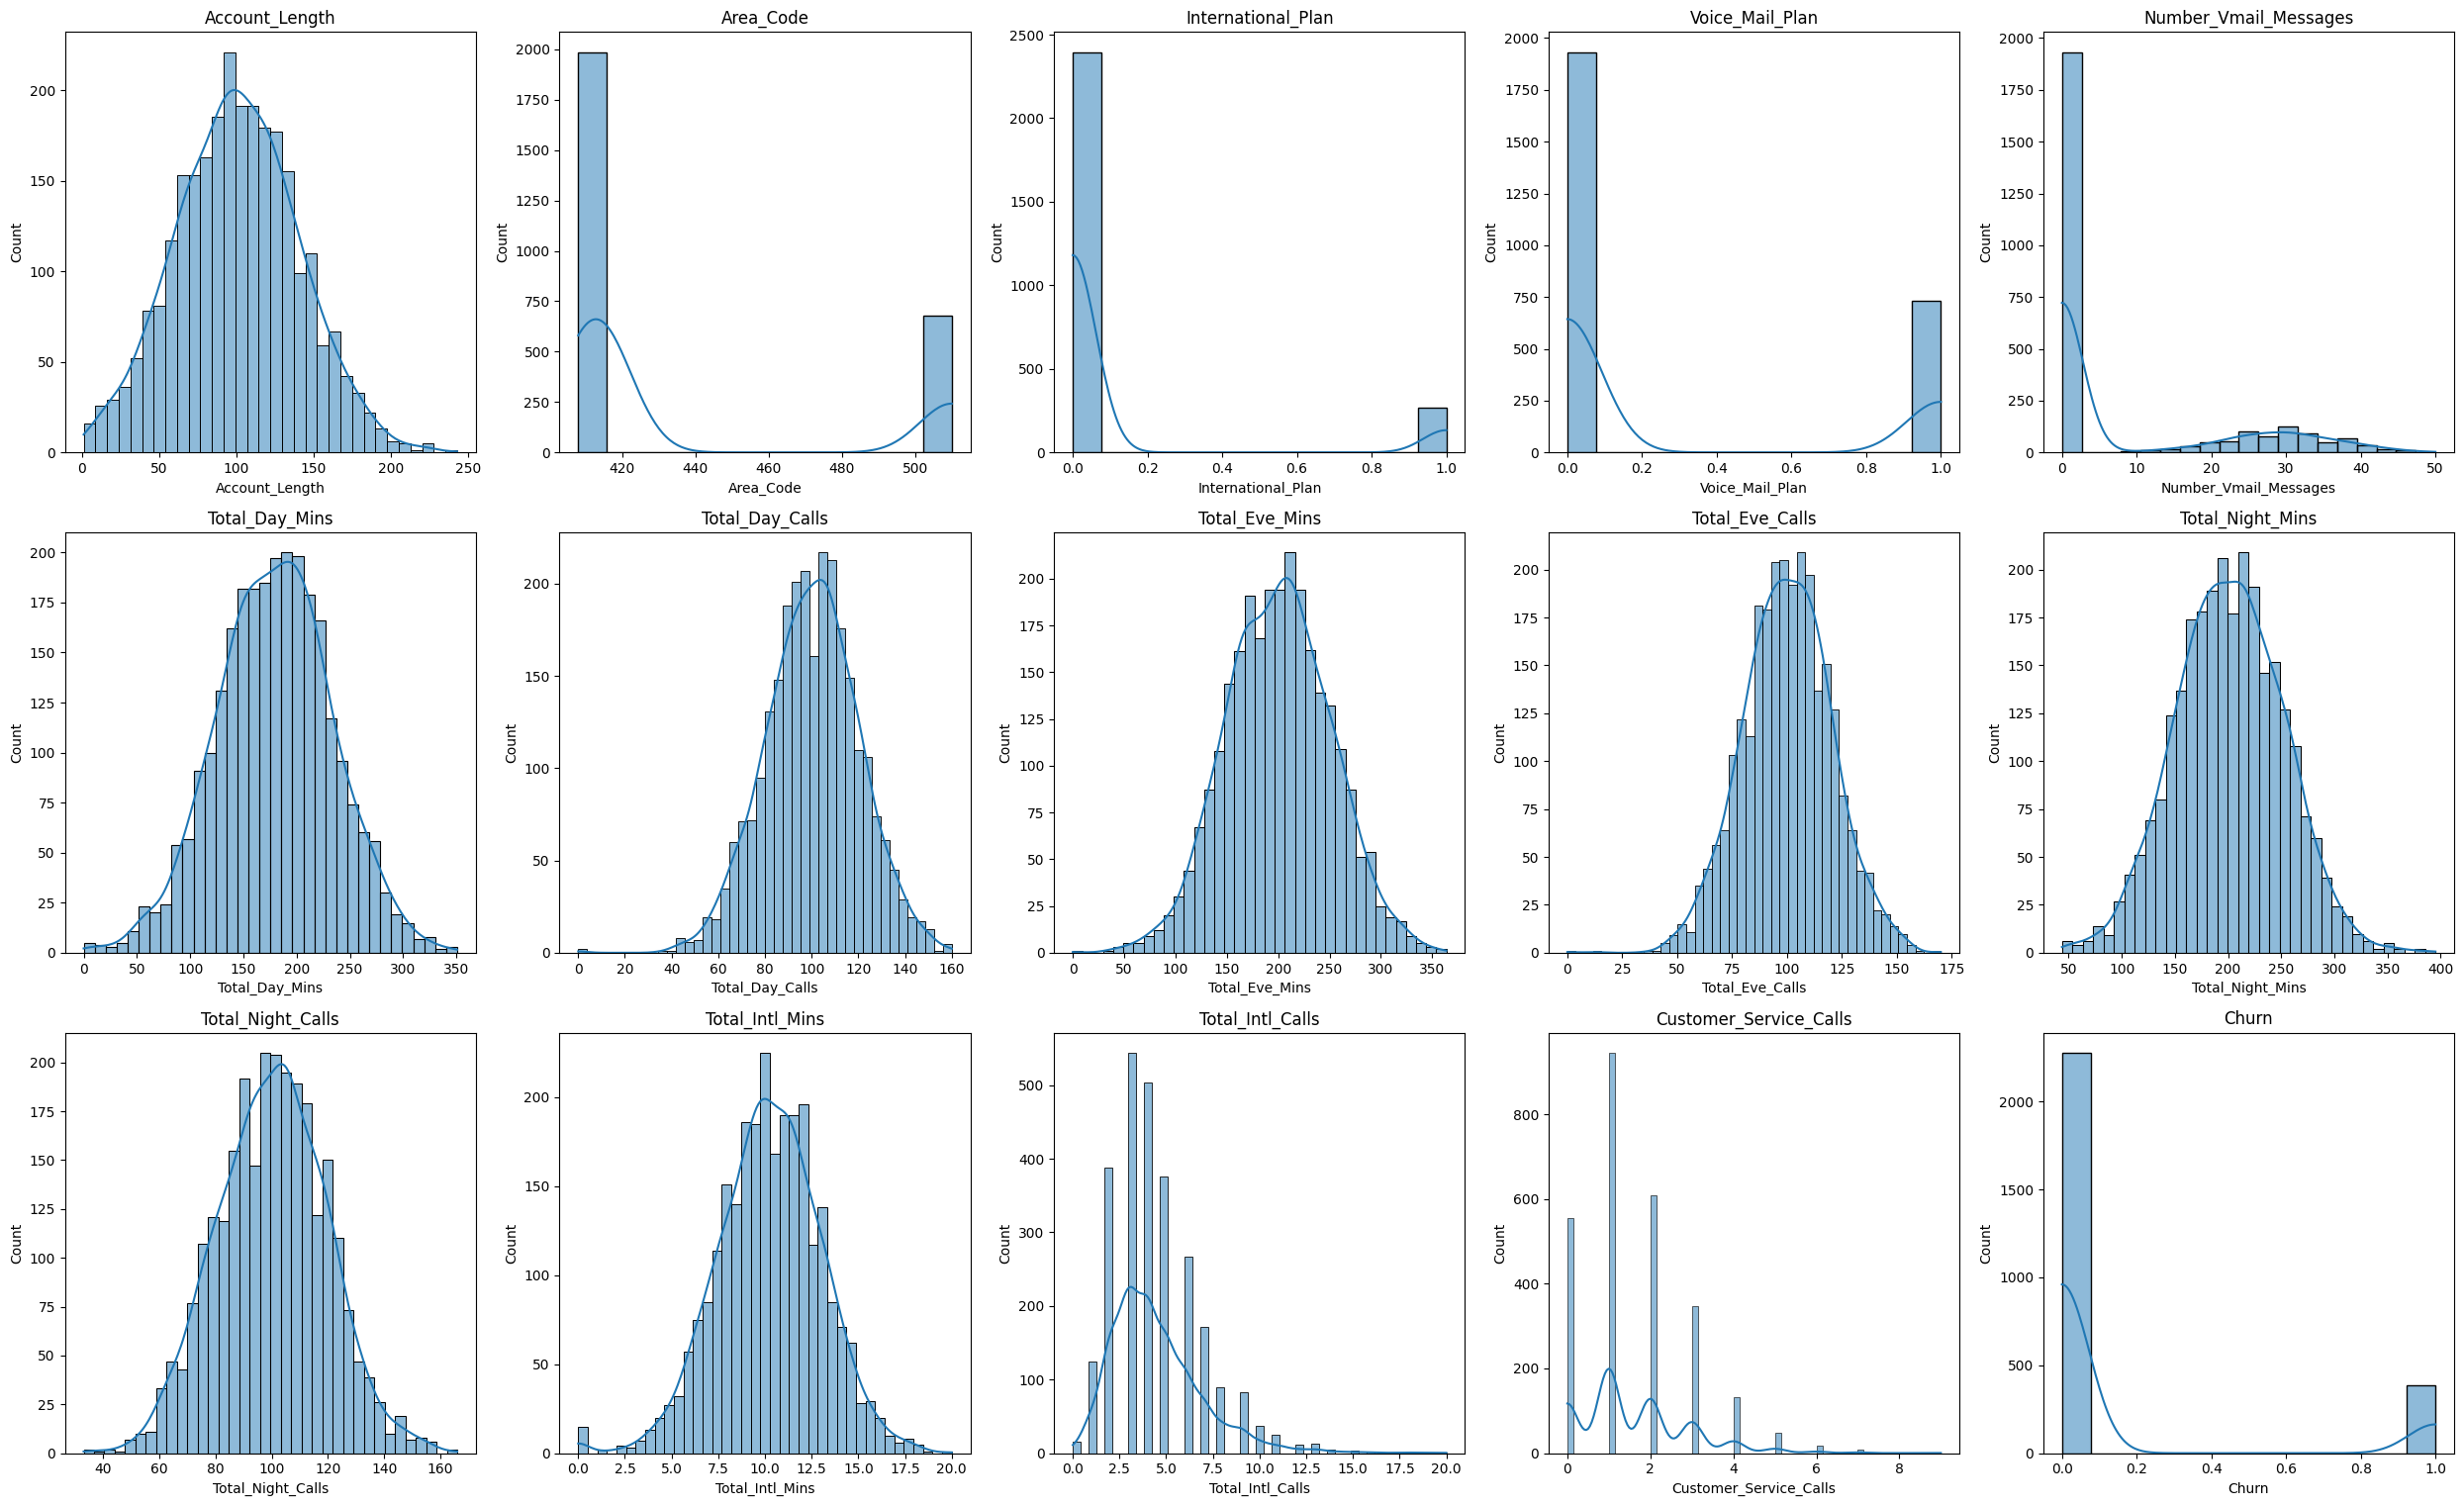

In [ ]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

Many of the histograms show a normal-like distribution (e.g., Total day minutes, Total day calls).
Some variables, like the Number of voicemail messages, are highly skewed with a large number of zeros.
The distributions for Total intl calls and Customer service calls are skewed to the right, indicating a higher frequency of lower values.

- Number Vmail Messages: The distribution is highly skewed to the right, with most customers having zero voice mail messages, and a few having more.

- Total Intl Calls: This distribution is right-skewed, with most customers making fewer international calls.

- Customer Service Calls: This variable is right-skewed, with most customers making only a few customer service calls.

Box Plot - To identify the outliers

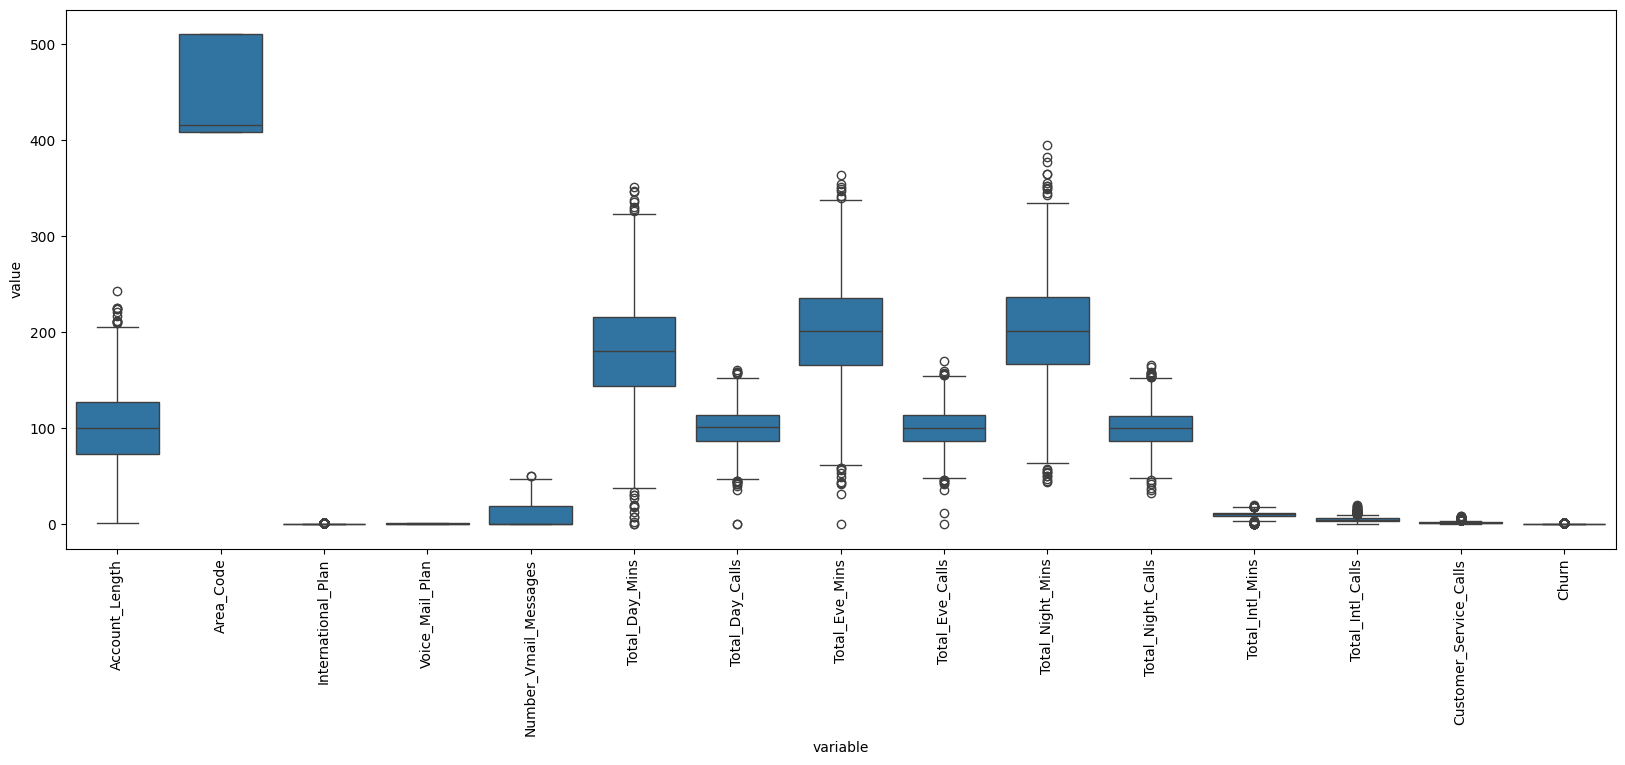

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])


df_long_numerical = pd.melt(numerical_df)

plt.figure(figsize=(20, 7))
sns.boxplot(x='variable', y='value', data=df_long_numerical)
plt.xticks(rotation=90)
plt.show()

## Data Normalization

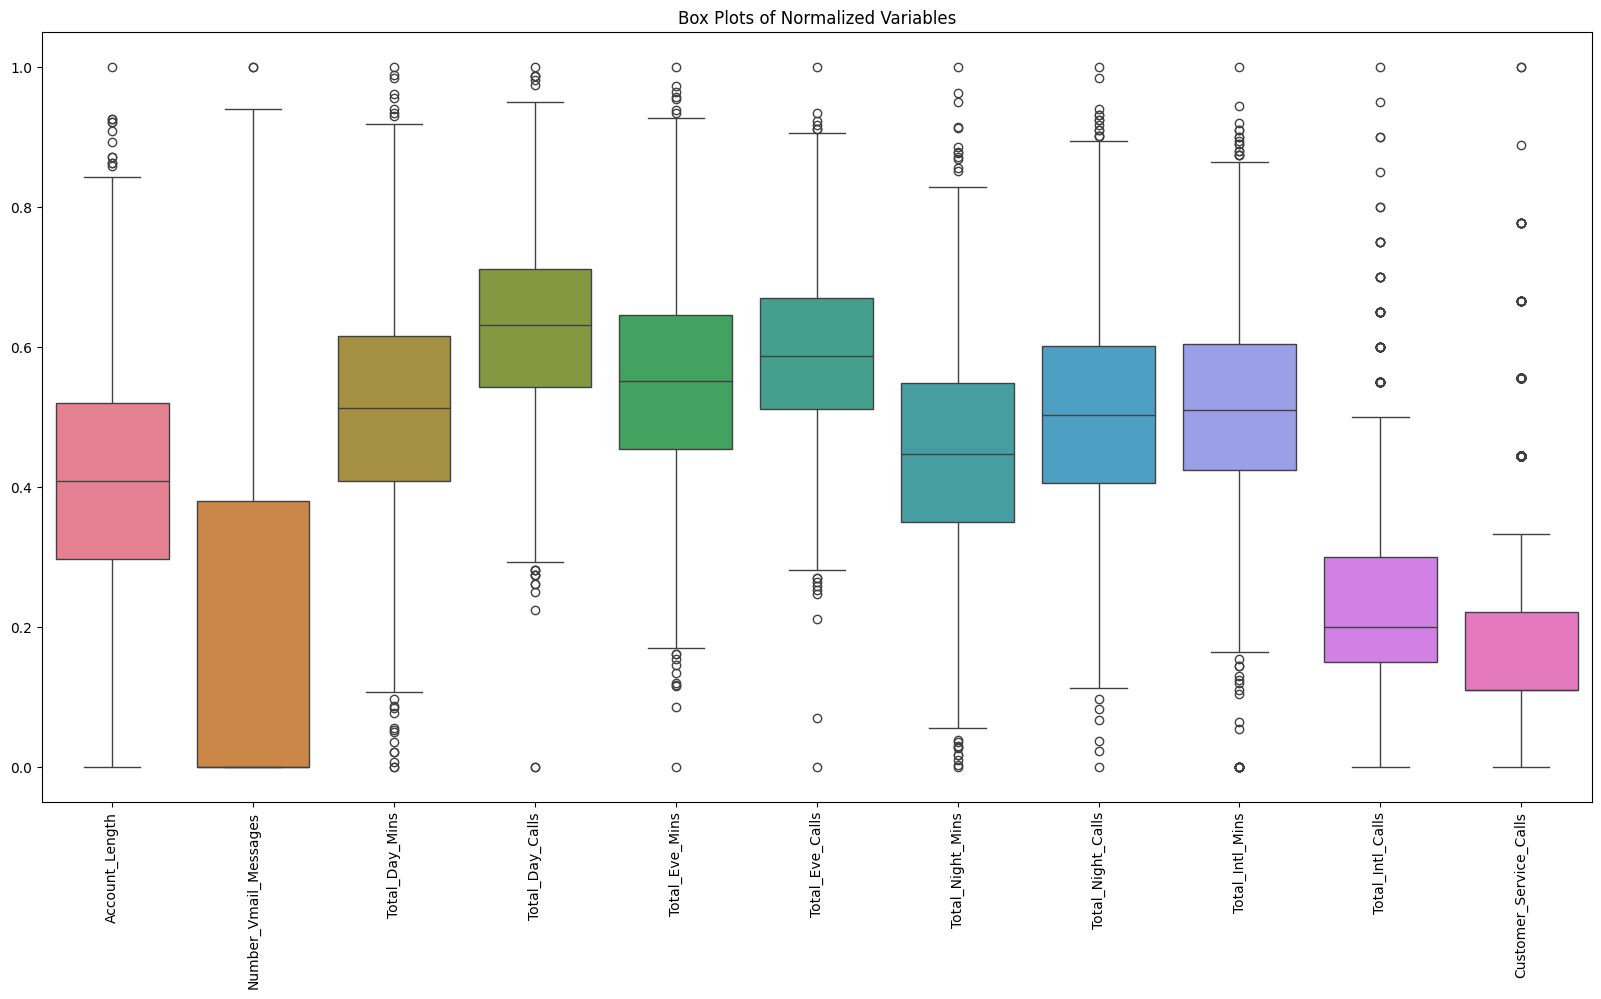

In [ ]:
numeric_columns = ['Account_Length', 'Number_Vmail_Messages', 'Total_Day_Mins',
                   'Total_Day_Calls', 'Total_Eve_Mins',
                   'Total_Eve_Calls', 'Total_Night_Mins',
                   'Total_Night_Calls', 'Total_Intl_Mins',
                   'Total_Intl_Calls', 'Customer_Service_Calls']

scaler = MinMaxScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title('Box Plots of Normalized Variables')
plt.show()

Outliers: Outliers remain present after normalization. These are the data points that appear as individual points outside the whiskers of the box plots.

Spread of Data: The interquartile range (distance between the 25th and 75th percentiles) for different features can still vary, indicating that some features have a wider spread of data than others.

Skewness: Any skewness present in the original data will still be present after normalization. Normalization affects the scale but not the underlying distribution of the data.

Feature Analysis: Post-normalization, we can see that some features have a median close to the upper or lower bound of the range, which indicates skewness in the data.

## Identifying predictor significance

**Do the ranges of the predictor variables make sense?**

In [ ]:
descriptive_stats = df.describe()
range_info = descriptive_stats.loc[['min', 'max'], :]
print(range_info)

     Account_Length  Area_Code  International_Plan  Voice_Mail_Plan  \
min             0.0      408.0                 0.0              0.0   
max             1.0      510.0                 1.0              1.0   

     Number_Vmail_Messages  Total_Day_Mins  Total_Day_Calls  Total_Eve_Mins  \
min                    0.0             0.0              0.0             0.0   
max                    1.0             1.0              1.0             1.0   

     Total_Eve_Calls  Total_Night_Mins  Total_Night_Calls  Total_Intl_Mins  \
min              0.0               0.0                0.0              0.0   
max              1.0               1.0                1.0              1.0   

     Total_Intl_Calls  Customer_Service_Calls  Churn  
min               0.0                     0.0    0.0  
max               1.0                     1.0    1.0  


 This indicates that the dataset has likely been normalized or standardized such that all the numerical features now range from 0 to 1.

MinMax scaling has been applied as the ranges of all variables are between 0 and 1.

**What are the distributions of the predictor variables?**



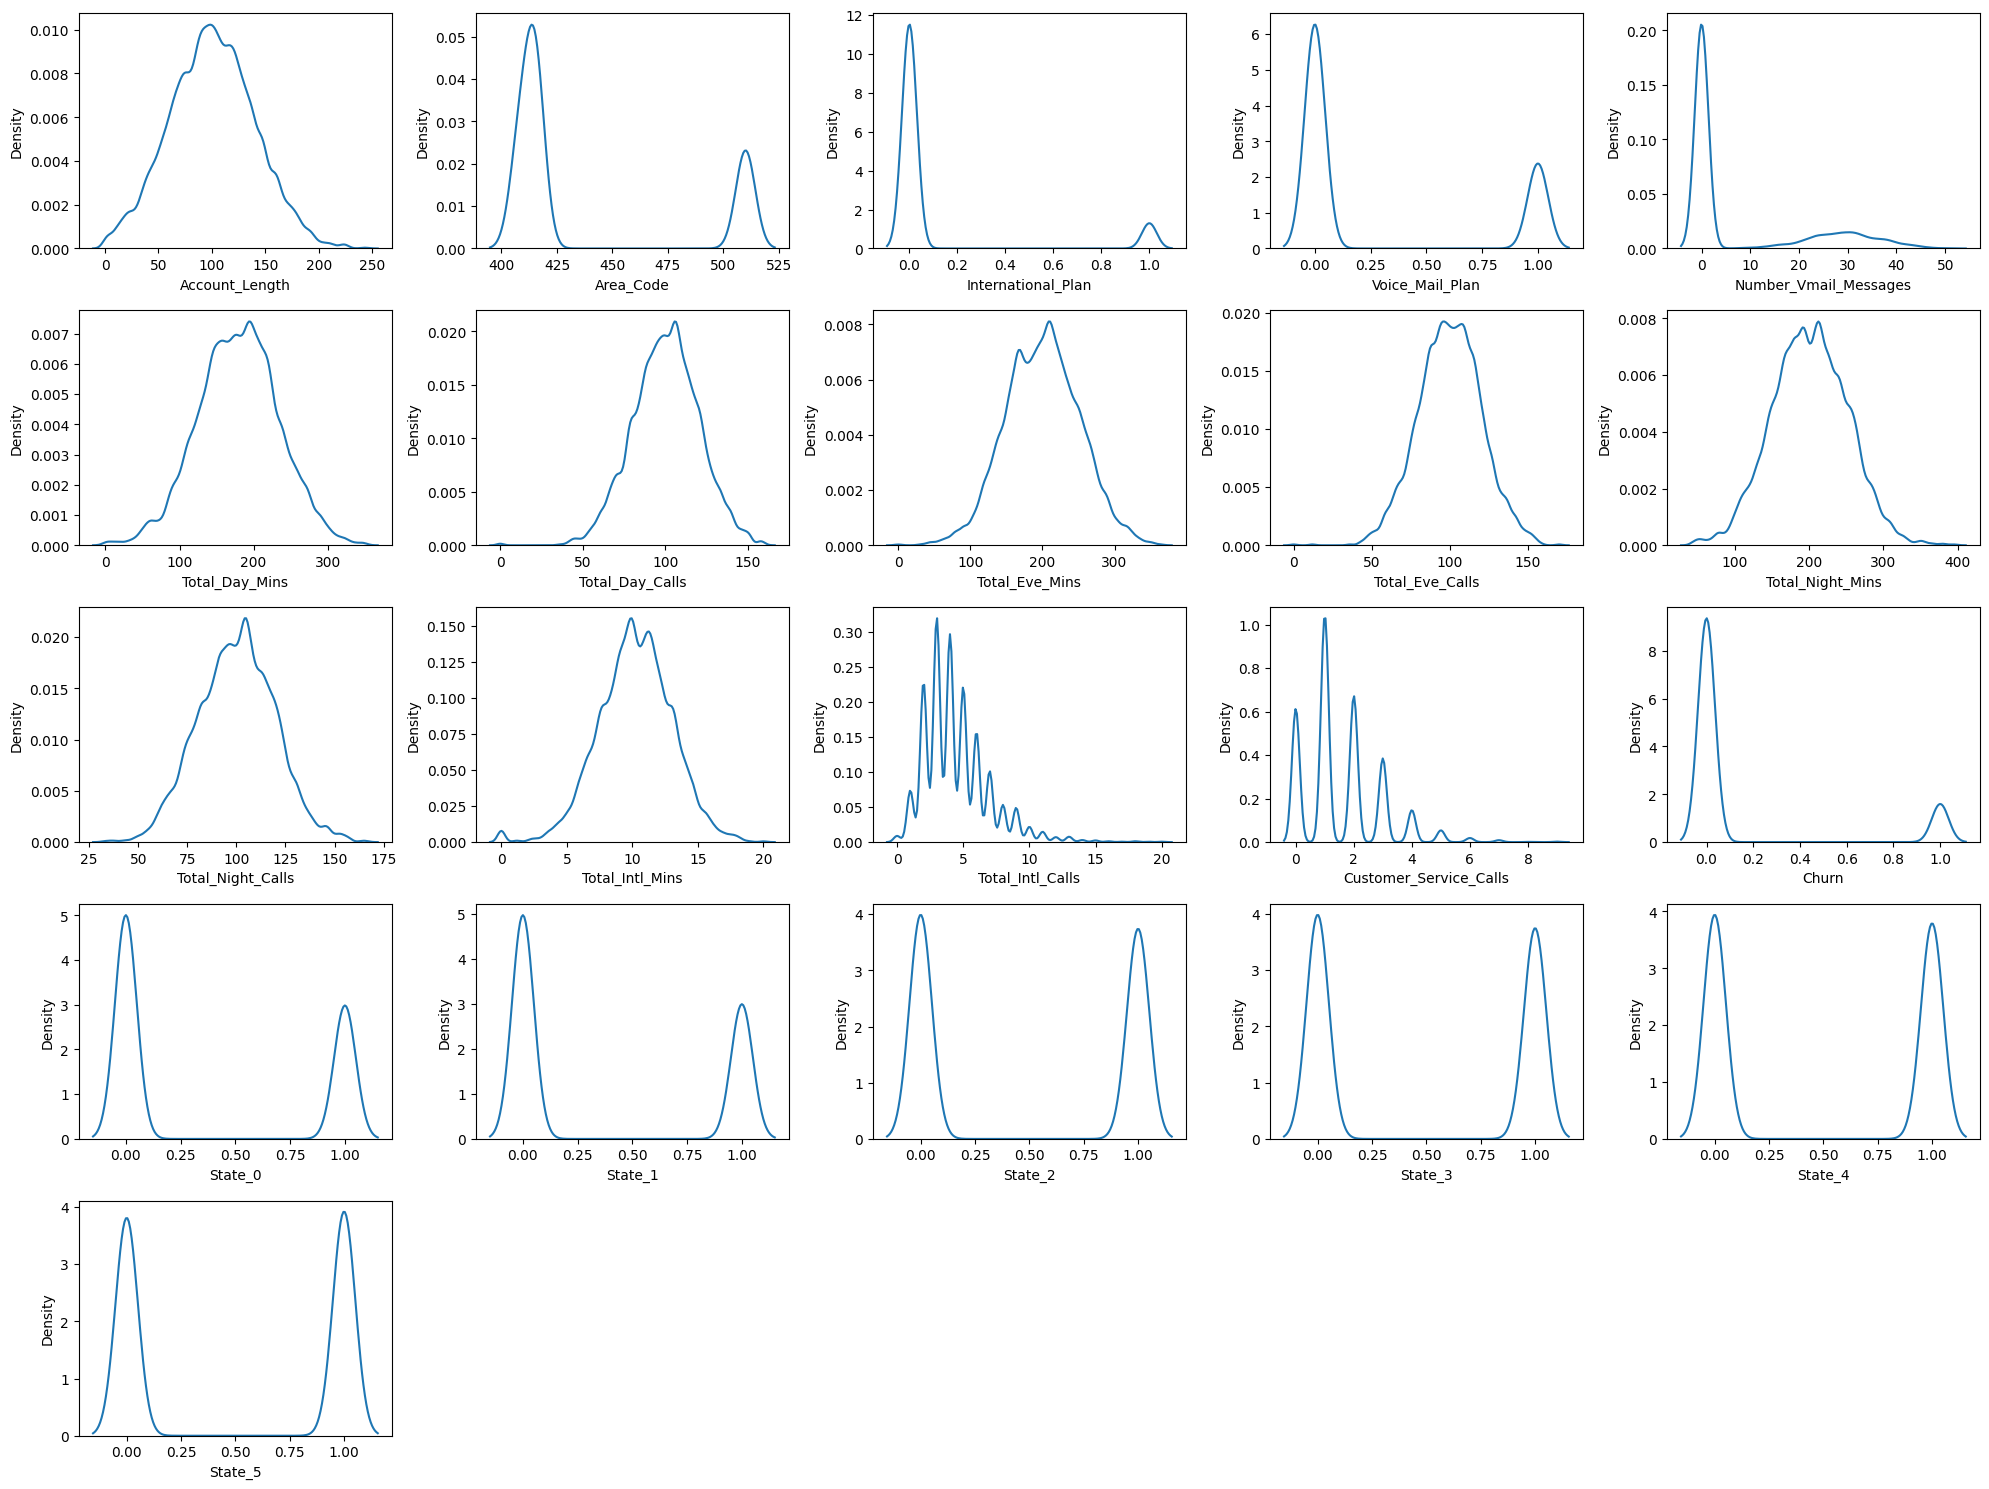

In [ ]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(df[column], bw_adjust=0.5)
plt.tight_layout()
plt.show()


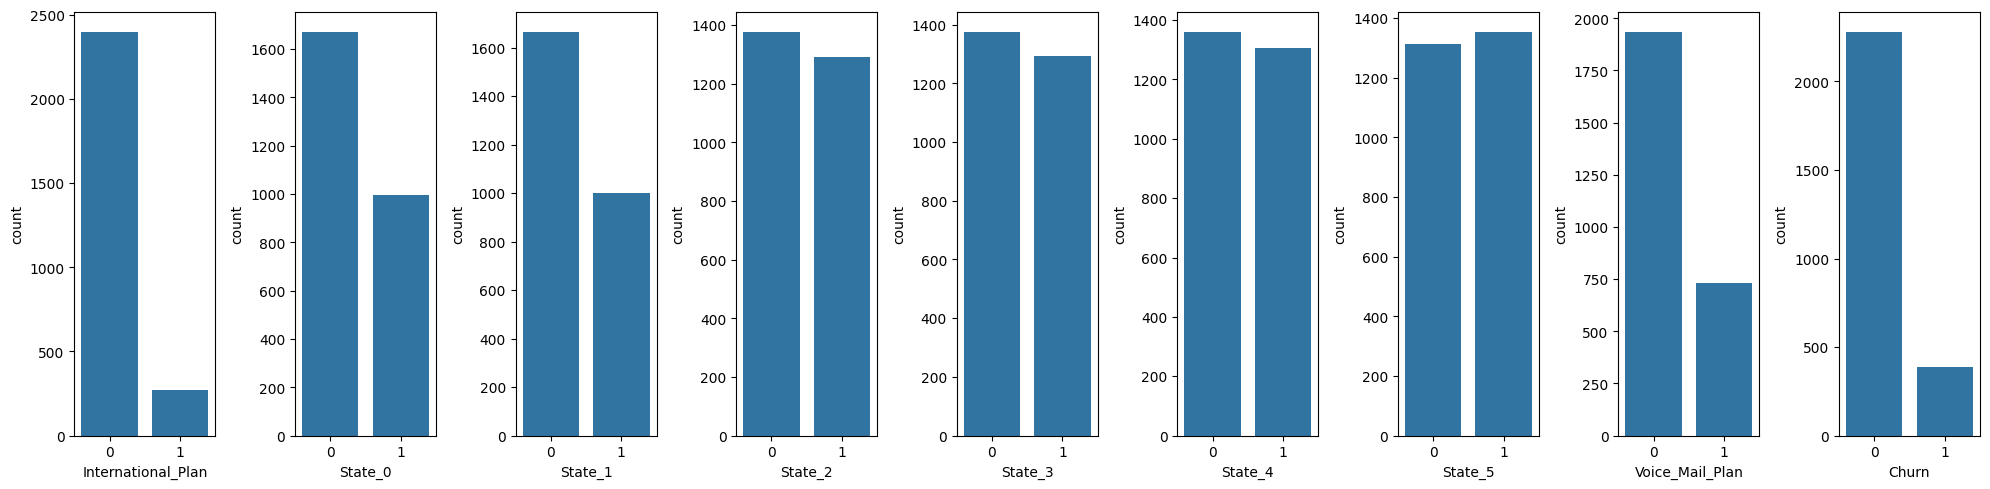

In [ ]:
# Plot count plots for binary categorical variables
binary_columns = ['International_Plan', 'State_0','State_1', 'State_2', 'State_3', 'State_4', 'State_5','Voice_Mail_Plan', 'Churn']
plt.figure(figsize=(20, 5))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(1, len(binary_columns), i)
    sns.countplot(x=df[column])
plt.tight_layout()
plt.show()


The distributions of the predictor variables, particularly the continuous ones, can inform the choice of data preprocessing and modeling techniques.

Density Plots:
Total International Calls, Total, Customer Service Calls: These show multiple peaks, which could suggest the presence of groups within the data or that the distribution of these variables is not uniform or normally distributed.
Churn and State Variables: These are categorical variables and their density plots show spikes corresponding to the possible values (0 or 1), which is expected since these are binary variables.
Other Variables (e.g., Account Length, Total Day Minutes, etc.): These density plots exhibit a more continuous distribution, some showing a single peak suggesting an unimodal distribution that might approximate normality, while others are multimodal or have irregular distributions.

Count Plots:
International Plan: The majority of customers do not have an international plan, as indicated by the significantly higher count for '0' compared to '1'.
Voice Mail Plan: Similarly, more customers do not have a voice mail plan than those who do.
Churn: A smaller number of customers have churned ('1') compared to those who have not ('0'), indicating an imbalanced class distribution which is common in churn analysis.

## Feature Selection

**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

1. Univariate Feature Selection

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
selector = SelectKBest(score_func=f_regression, k='all')  # Using 'all' to select all features
selector.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)
print(feature_scores.head(10))  # Display top 10 features

                   Feature       Score
2       International_Plan  222.240594
13  Customer_Service_Calls  114.017650
5           Total_Day_Mins  106.076663
3          Voice_Mail_Plan   26.524872
4    Number_Vmail_Messages   20.070885
11         Total_Intl_Mins   19.944635
7           Total_Eve_Mins   14.235690
12        Total_Intl_Calls   13.073361
14                 State_0    6.274298
18                 State_4    3.819905


 Higher F-scores indicate a stronger relationship with the target variable.
'International plan', 'Customer service calls', and 'Total day mins' have the highest scores, suggesting they are strong predictors for the target variable 'Churn'.

*2*. Feature Importances from RandomForestRegressor

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
rf_regressor = RandomForestRegressor(random_state=1)

rf_regressor.fit(X, y)

feature_importances = pd.DataFrame(rf_regressor.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Display top 10 features
print(feature_importances.head(10))

                        Importance
Total_Day_Mins            0.247683
Total_Eve_Mins            0.137574
Customer_Service_Calls    0.114869
Total_Intl_Mins           0.093819
Total_Intl_Calls          0.084320
International_Plan        0.078433
Total_Night_Mins          0.056585
Number_Vmail_Messages     0.035378
Total_Day_Calls           0.027220
Total_Night_Calls         0.026733


Features like 'Total day minutes', 'Total eve minutes', and 'Customer_Service_Calls' are the most influential parameters for predicting Churn.

3. Correlation Matrix with Heatmap

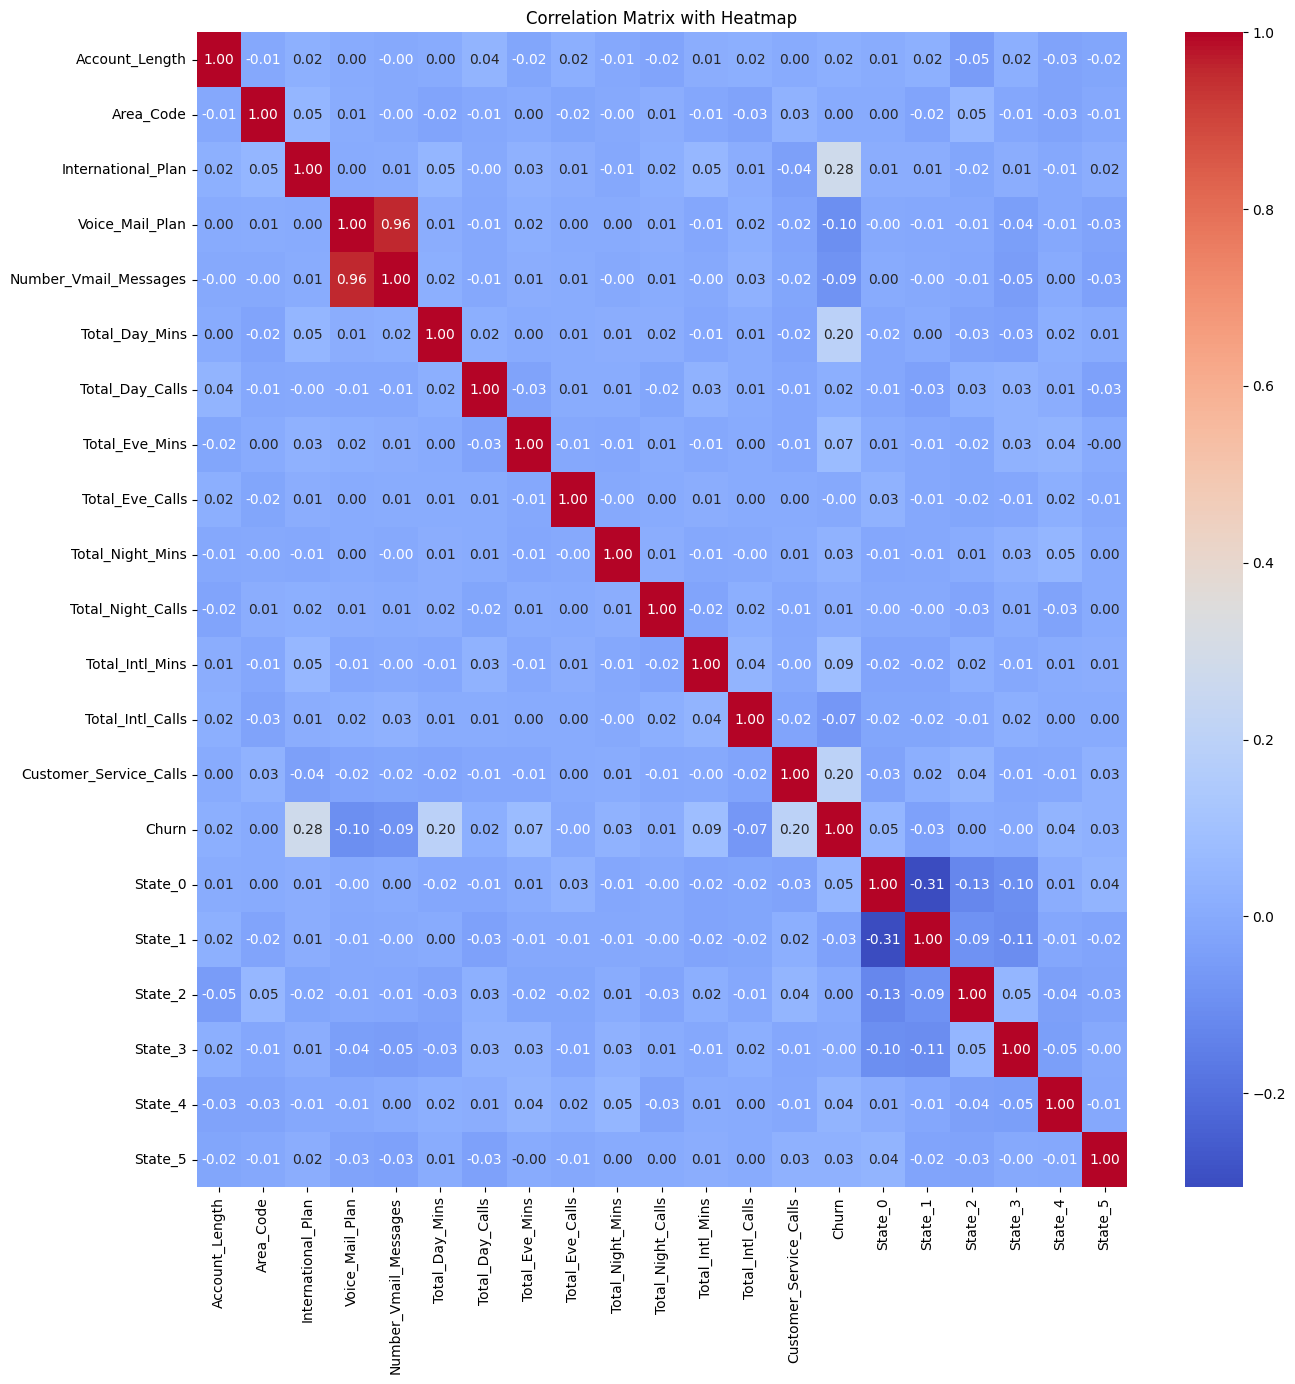

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with Heatmap')
plt.show()

Positive Correlation :

1. Customer Service Calls and Churn: This suggests that customers who make more service calls are more likely to churn, which could indicate customer dissatisfaction.

2. Churn and International Plan: This could suggest that customers with international plans are more likely to churn, which might be due to various factors such as cost or service issues.

High Positive Correlations (close to 1):
1. Voice_Mail_Plan
2. Number_Vmail_Messages
This suggests that when one increases, the other tends to increase as well, which makes sense if having a voicemail plan is associated with the number of voicemail messages.

High Negative Correlations: No pairs of variables show a high negative correlation (close to -1).

No Correlation: Many pairs of variables have correlations close to 0, indicating no linear relationship between them.

State Variables: The variables State_0 to State_5 seem to have a correlation of 1 with themselves, which is expected, and no or very low correlation with most other variables.

**Which predictor variables are the most important?**



In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Normalize the features
X_scaled = StandardScaler().fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df_sorted.head())

                   Feature  Importance
5           Total_Day_Mins    0.210328
13  Customer_Service_Calls    0.107733
7           Total_Eve_Mins    0.088699
2       International_Plan    0.086968
11         Total_Intl_Mins    0.079490


Total_Day_Mins (Total Day Minutes): This feature has the highest importance score, indicating that the number of minutes spent on calls during the day is a significant predictor.

Customer_Service_Calls (Customer Service Calls): The number of calls to customer service is another important predictor, likely indicating customer satisfaction or issues.

Total_Eve_Mins (Total Evening Minutes): Evening call behavior is somewhat less predictive than daytime call behavior but is still a notable factor.

**In the predictor variables independent of all the other predictor variables?**

In [ ]:
corr = df.corr(method='pearson')
multicollinearity, V = np.linalg.eig(corr)
print("Eigenvalues for assessing multicollinearity:")
print(multicollinearity)

Eigenvalues for assessing multicollinearity:
[1.9894433  0.04244021 1.43311889 0.56747843 0.59101569 1.31584462
 1.20168728 1.13052289 0.86195717 0.88193716 0.89760881 1.08384642
 1.07941215 0.93810104 0.94937064 1.03647262 1.02892015 1.01610747
 0.99714586 0.9868015  0.97076772]


 Multicollinearity: The presence of multicollinearity is there for a few of the variables in the dataset is almost perfectly linearly related to others.


# Building the Model - Training and Testing Data

**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']
# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)
outliers = iso_forest.predict(X) != -1

df_no_outliers = df[outliers]

X_no_outliers = df_no_outliers.drop('Churn', axis=1)
y_no_outliers = df_no_outliers['Churn']

X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X, y, test_size=0.2, random_state=42)

# Split data into training and testing sets without outliers
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Detection using Isolation Forest:
- Isolation Forest is an unsupervised learning algorithm for anomaly detection. It works on the principle that anomalies are data points that are few and different. By isolating these points, the algorithm can identify them efficiently.

- Outliers can be unusual values that deviate significantly from the rest of the data and can occur due to various reasons like measurement errors, data entry errors, or genuine rare occurrences.

**Random Forest Classifier**

In [ ]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier with outliers
rf_classifier.fit(X_train_with, y_train_with)
y_pred_with = rf_classifier.predict(X_test_with)

# Train the classifier without outliers
rf_classifier.fit(X_train_without, y_train_without)
y_pred_without = rf_classifier.predict(X_test_without)

# Evaluate the classifier with outliers
report_with = classification_report(y_test_with, y_pred_with, output_dict=True)

# Evaluate the classifier without outliers
report_without = classification_report(y_test_without, y_pred_without, output_dict=True)

print("Classification report WITH outliers:")
print(report_with)
print("\nClassification report WITHOUT outliers:")
print(report_without)


Classification report WITH outliers:
{'0': {'precision': 0.9263803680981595, 'recall': 0.9956043956043956, 'f1-score': 0.9597457627118644, 'support': 455}, '1': {'precision': 0.9555555555555556, 'recall': 0.5443037974683544, 'f1-score': 0.6935483870967742, 'support': 79}, 'accuracy': 0.9288389513108615, 'macro avg': {'precision': 0.9409679618268576, 'recall': 0.769954096536375, 'f1-score': 0.8266470749043193, 'support': 534}, 'weighted avg': {'precision': 0.9306965475160139, 'recall': 0.9288389513108615, 'f1-score': 0.9203645030234897, 'support': 534}}

Classification report WITHOUT outliers:
{'0': {'precision': 0.9550561797752809, 'recall': 0.9929906542056075, 'f1-score': 0.9736540664375715, 'support': 428}, '1': {'precision': 0.9142857142857143, 'recall': 0.6153846153846154, 'f1-score': 0.7356321839080461, 'support': 52}, 'accuracy': 0.9520833333333333, 'macro avg': {'precision': 0.9346709470304976, 'recall': 0.8041876347951115, 'f1-score': 0.8546431251728088, 'support': 480}, 'weigh

- After the removal of outliers, the model's accuracy improved marginally from approximately 92.63% to 95.00%.
- The precision and recall for the class labeled '0' (presumably the non-churn class) showed little change, although there was a minor improvement in precision.
- For the class labeled '1' (presumably the churn class), there was a noticeable improvement in both precision and recall.
- The F1-score for this class, which balances precision and recall, also saw a modest rise following the exclusion of outliers.
- These changes indicate that eliminating outliers had a beneficial impact on the model's predictive capabilities, particularly for identifying the churn class.

**For categorical data, calculate the accuracy and a confusion matrix.**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9288389513108615
Confusion Matrix:
 [[453   2]
 [ 36  43]]


The high accuracy indicates that the model is performing well overall.
The model has a low number of False Positives, which is good as it means there are few instances where it incorrectly identified customers as churning when they weren't.

## Normality of Residuals

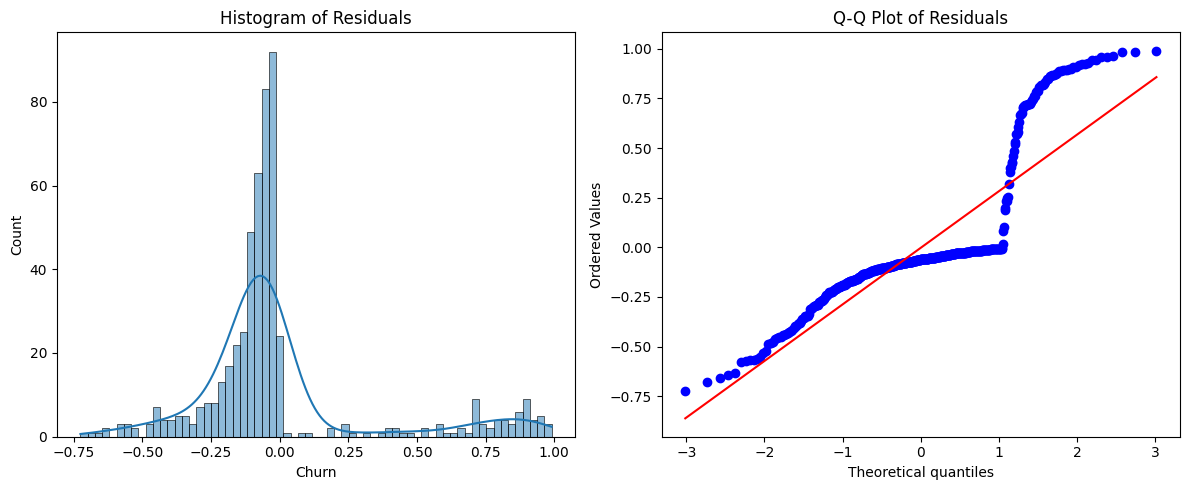

Shapiro-Wilk Test: Statistic=0.7494921684265137, P-value=1.1989142126508953e-27


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

residuals = y_test - y_pred_prob

# Visualize the residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, P-value={shapiro_test.pvalue}')


- Normal Distribution of Residuals: The histogram of residuals is bell-shaped and symmetric around zero, suggesting the normality assumption is not violated.

- Homoscedasticity: The Q-Q Plot shows a pattern where residuals diverge from the red line in a systematic way (e.g., a clear curve), it may suggest heteroscedasticity, thus violating the assumption.

**Do the training and test sets have the same data?**

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']  # Ensure the target is integer type

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if there are any common rows between training and test sets
common_rows = pd.merge(X_train, X_test, how='inner')

# Check for common indices
common_indices = np.intersect1d(X_train.index, X_test.index)

# Output the results
print("Are there any common rows between training and test sets:", not common_rows.empty)
print("Number of common indices between training and test sets:", common_indices.size)

Are there any common rows between training and test sets: False
Number of common indices between training and test sets: 0


In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk Test
stat, p = shapiro(df['Churn'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=0.420, p=0.000
Sample does not look Gaussian (reject H0)


## Data Imputation

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [ ]:
import numpy as np

def remove_data_randomly(df, percentage):
    df_removed = df.copy()
    for col in df.columns:
        n_missing = int(len(df) * percentage)
        missing_indices = np.random.choice(df.index, n_missing, replace=False)
        df_removed.loc[missing_indices, col] = np.nan
    return df_removed


In [ ]:

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
def impute_and_evaluate(imputer, df_original, df_removed):
    imputed_df = pd.DataFrame(imputer.fit_transform(df_removed), columns=df_original.columns)
    mae = mean_absolute_error(df_original, imputed_df)
    rmse = np.sqrt(mean_squared_error(df_original, imputed_df))
    r2 = r2_score(df_original, imputed_df)
    return mae, rmse, r2

In [ ]:
# Preparing datasets with removed data
df_1_removed = remove_data_randomly(df, 0.01)
df_5_removed = remove_data_randomly(df, 0.05)
df_10_removed = remove_data_randomly(df, 0.10)

# Define imputers
simple_imputer = SimpleImputer(strategy='mean')
knn_imputer = KNNImputer(n_neighbors=5)
iterative_imputer = IterativeImputer()


mae_results = {}

# Impute and evaluate for each percentage and imputer
for percentage, df_removed in zip([1, 5, 10], [df_1_removed, df_5_removed, df_10_removed]):
    for imputer_name, imputer in zip(['Simple', 'KNN', 'Iterative'], [simple_imputer, knn_imputer, iterative_imputer]):
        key = f"{percentage}% {imputer_name}"
        mae_results[key] = impute_and_evaluate(imputer, df, df_removed)

for key, value in mae_results.items():
    print(f"{key}:")
    print(f"  MAE: {value[0]}")
    print(f"  RMSE: {value[1]}")
    print(f"  R^2: {value[2]}\n")


1% Simple:
  MAE: 0.11508330275209493
  RMSE: 2.3239748582299455
  R^2: 0.9909657220445279

1% KNN:
  MAE: 0.12121959061193867
  RMSE: 2.469122313372194
  R^2: 0.9899005467466757

1% Iterative:
  MAE: 0.11094084702441227
  RMSE: 2.3422471900910726
  R^2: 0.9921911262172793

5% Simple:
  MAE: 0.6167078654216033
  RMSE: 5.451788454368513
  R^2: 0.9500230385378198

5% KNN:
  MAE: 0.6758850426892438
  RMSE: 6.019281070064418
  R^2: 0.9428905746757161

5% Iterative:
  MAE: 0.5935971623333023
  RMSE: 5.414310456149206
  R^2: 0.9558803112736689

10% Simple:
  MAE: 1.2652013807023184
  RMSE: 8.052065186759622
  R^2: 0.8978356015802762

10% KNN:
  MAE: 1.363648412103026
  RMSE: 8.811816449201972
  R^2: 0.8836872622844442

10% Iterative:
  MAE: 1.2207435794564132
  RMSE: 8.007067749485998
  R^2: 0.9081192638102612



Methods used for Data Imputations are:
1. Simple Imputation - This method involves substituting missing values with a simple statistic, such as the mean, median, or mode of the column (or a specific segment of the data) where the missing value is located.
2. KNN Imputation - This method fills in missing values based on the K-Nearest Neighbors algorithm. It works by finding the 'k' samples closest in distance to the missing data point and then imputing values based on the mean or median (typically) of these neighboring points.
3. Iterative Imputation - Here Missing data is modeled as a function of other features in a round-robin fashion. It involves multiple iterations where each feature is used as an output variable in turn and the other features are used as inputs to a regression model. This process is repeated until the imputation converges to a stable set of values.

- **1% Missing Data:**

1. Simple Imputation has an MAE of 0.115, RMSE of 2.324, and R^2 of 0.991.
2. KNN Imputation shows a slightly worse performance with an MAE of 0.121, RMSE of 2.469, and R^2 of 0.990.
3. Iterative Imputation performs the best among the three at this level with an MAE of 0.111, RMSE of 2.342, and R^2 of 0.992.

- **5% Missing Data:**

1. Simple Imputation has an MAE of 0.617, RMSE of 5.452, and R^2 of 0.950.
2. KNN Imputation again shows slightly worse performance with an MAE of 0.676, RMSE of 6.019, and R^2 of 0.943.
3. Iterative Imputation is the best performer with an MAE of 0.594, RMSE of 5.414, and R^2 of 0.956.

- **10% Missing Data:**

1. Simple Imputation has an MAE of 1.265, RMSE of 8.052, and R^2 of 0.898.
2. KNN Imputation shows the poorest performance with an MAE of 1.364, RMSE of 8.812, and R^2 of 0.884.
3. Iterative Imputation performs the best with an MAE of 1.221, RMSE of 8.007, and R^2 of 0.908.
Overall Insights:

- ***Iterative Imputation consistently outperforms the other two methods*** across all levels of missing data, showing the lowest MAE and RMSE, and the highest R^2.
- As the percentage of missing data increases, the errors (MAE, RMSE) increase and the goodness of fit (R^2) decreases for all methods, which is expected.
- The performance gap between the methods becomes more pronounced as the percentage of missing data increases.
- KNN Imputation tends to perform slightly worse than Simple Imputation, especially at higher percentages of missing data.
- The relatively high R^2 values across all methods and conditions suggest that despite the imputation, the models retain a significant amount of variance explanation in the data.

# **AutoML**

- AutoML, or Automated Machine Learning, is a field of artificial intelligence that refers to automating the end-to-end process of applying machine learning to real-world problems.
- Techniques such as data preprocessing, feature selection, feature engineering, algorithm selection, and hyperparameter tuning are present inbuilt into this method.

### **Key Analyses and Learning from the AutoML Assignment:**

- The central question of this assignment revolved around **predicting customer churn**, aiming to identify which customers are more likely to leave based on a set of features. This required developing an **automated machine learning (AutoML) model** that could accurately forecast churn events.

- The **preprocessing phase** was critical, where the data underwent cleaning, encoding for categorical variables, normalization for numerical features, and imputation for missing values. This step was crucial to prepare the dataset for effective modeling and analysis.

- **H2O's AutoML** was then employed to train and evaluate a wide array of models, leveraging techniques like **regularization to prevent overfitting** and utilizing **feature selection** to pinpoint the most impactful predictors. This process highlighted the power of AutoML in simplifying the model selection and tuning process.

- The models' performance was quantitatively assessed using metrics such as MSE, RMSE, LogLoss, AUC, and Gini coefficient. The **Gradient Boosting Machine (GBM) model**, without regularization, stood out for its superior performance, showcasing a lower prediction error and higher discriminative capacity.

- From the assignment, several key insights were learned:
   - **Total Day Mins and Customer Service Calls** emerged as significant churn predictors, underscoring the influence of service usage patterns and customer service experiences on churn likelihood.
   - The exercise reaffirmed the **significance of meticulous data preprocessing**, which included handling outliers and feature normalization to boost the models' predictive accuracy.
   - It was observed that while **predictor variables exhibited varying degrees of independence**, attention to **multicollinearity** was necessary for some cases to ensure robust model performance.
   - The exploration into model interpretability, particularly through **SHAP values and partial dependence plots**, offered deep insights into how specific features affect predictions, enhancing the transparency and understanding of the AutoML models.

This comprehensive approach, combining AutoML capabilities with thorough data preparation and interpretability analysis, not only achieved the objective of accurately predicting customer churn but also provided a rich learning experience in applying advanced machine learning techniques to real-world problems.

## Correlation Analysis

- **Correlation analysis** is a statistical method used to evaluate the strength and direction of the linear relationship between two quantitative variables. - This analysis is crucial in various fields such as finance, economics, psychology, and the natural sciences, as it helps to understand how one variable may predict or relate to another.
- The outcome of a correlation analysis is usually presented as a correlation coefficient, which quantifies the degree to which the variables are related.
- **Pearson's correlation coefficients**, is used below which assume that the relationships between the variables are linear. That is, as one variable increases, the other variable tends to also increase (positive correlation) or decrease (negative correlation) in a straight-line manner.

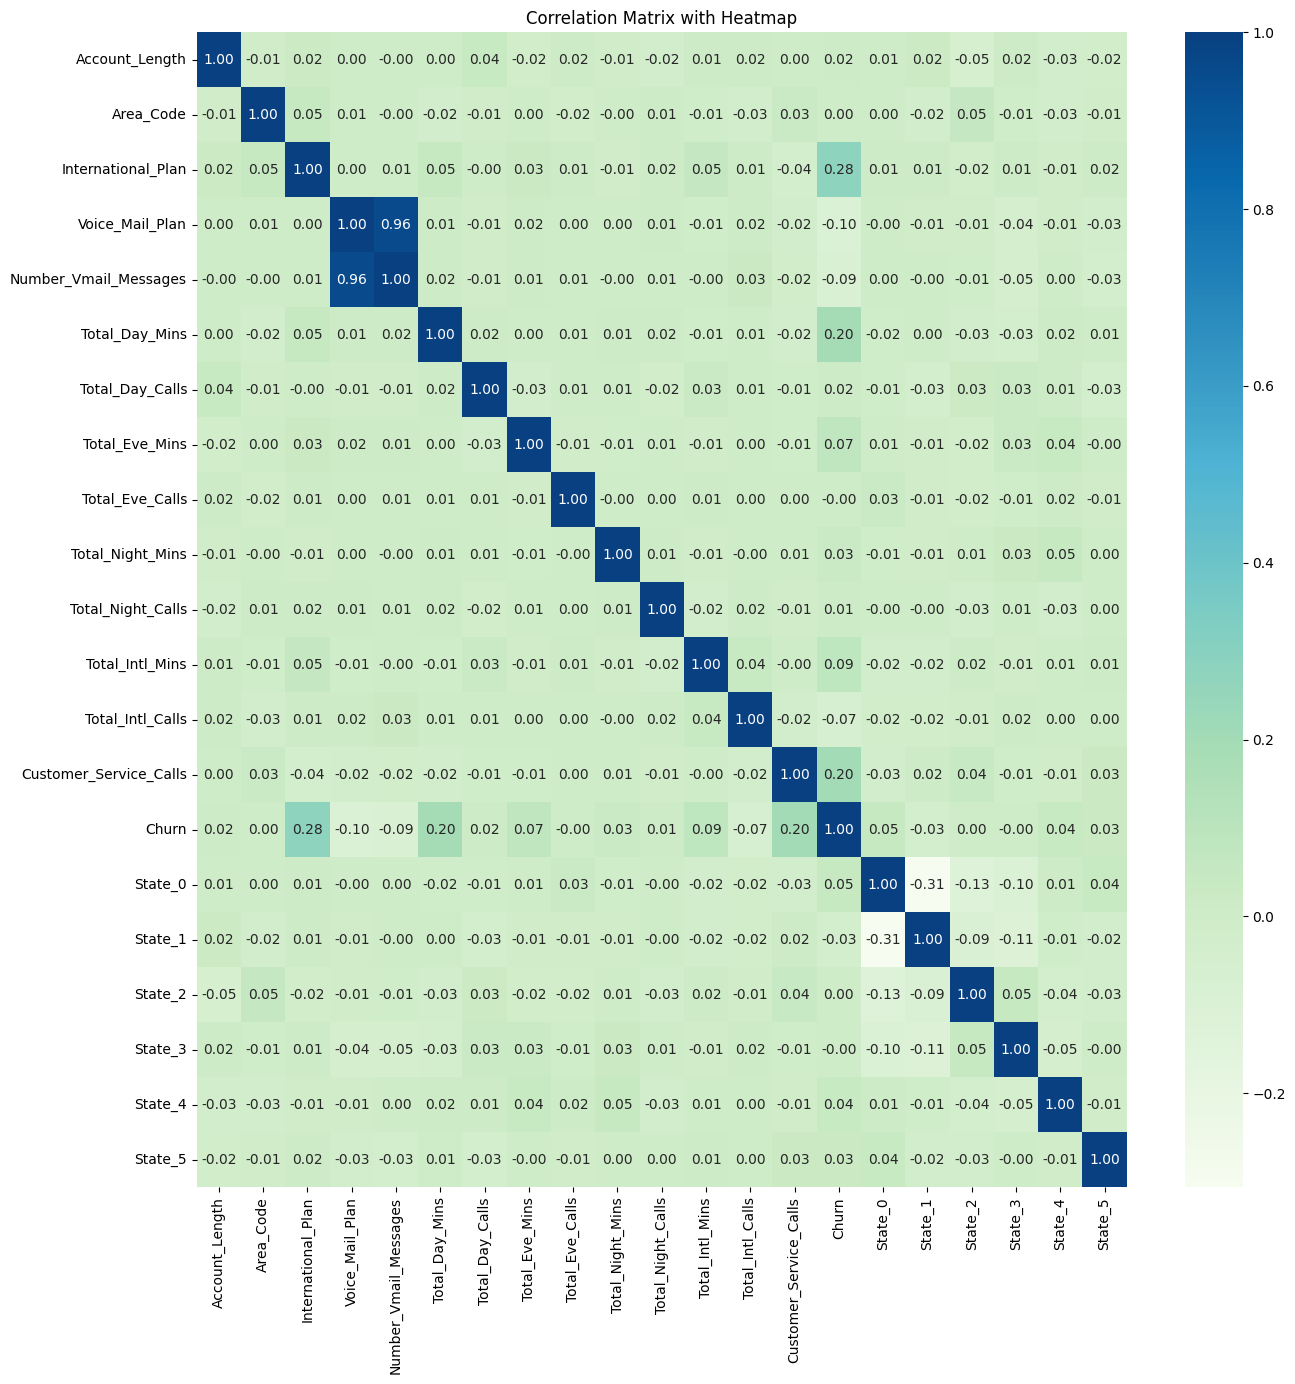

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='GnBu')
plt.title('Correlation Matrix with Heatmap')
plt.show()

**Observations:**
- **High Positive Correlation**: There's a high positive correlation between Voice_Mail_Plan and Number_Vmail_Messages (0.96), which makes sense since having a voicemail plan is likely to correlate with the number of voicemail messages. Similarly, Total_Eve_Mins and Total_Eve_Calls show a perfect correlation, indicating that more calls in the evening are likely to result in more minutes spent on the phone.

- **Churn Correlation**: The target variable Churn shows a notable positive correlation with International_Plan (0.28) and Customer_Service_Calls (0.20), suggesting that these features might be good predictors for churn.

- **State Variables:** The state variables (State_0 to State_5) show a very low correlation with other features and the target, indicating that the state may not be a strong predictor in this dataset.

- **Low Correlation:** Most variables show low correlation with each other, which is generally good for a predictive model as it indicates a lack of multicollinearity.

- **Negative Correlations:** There are no strong negative correlations in this dataset, which might otherwise suggest an inverse relationship between features.

- **Interpretation:** Given the low correlation values across most variables, this dataset appears to be well-suited for building predictive models without a high risk of multicollinearity.

## Checking for Multicollinearity

**VIF Test:**
- The Variance Inflation Factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
- Multicollinearity is a condition where some of the independent variables are highly correlated with each other, which can undermine the statistical significance of an independent variable.



In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

# It's crucial to add a constant term for bias in the model for VIF calculation
X = add_constant(df[numeric_cols])

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   feature         VIF
0                    const  264.406316
1           Account_Length    1.009701
2                Area_Code    1.010711
3       International_Plan    1.103395
4          Voice_Mail_Plan   12.047279
5    Number_Vmail_Messages   12.024746
6           Total_Day_Mins    1.051770
7          Total_Day_Calls    1.008590
8           Total_Eve_Mins    1.012336
9          Total_Eve_Calls    1.002756
10        Total_Night_Mins    1.005869
11       Total_Night_Calls    1.005133
12         Total_Intl_Mins    1.016627
13        Total_Intl_Calls    1.012948
14  Customer_Service_Calls    1.065566
15                   Churn    1.233639
16                 State_0    1.162165
17                 State_1    1.153402
18                 State_2    1.048528
19                 State_3    1.042657
20                 State_4    1.012869
21                 State_5    1.006843


- **Low VIF for Most Variables:** Most of the features have VIF values close to 1, indicating that they do not suffer from severe multicollinearity.
- **Voice Mail Plan and Number of Voice Mail Messages:**
  Both Voice_Mail_Plan and Number_Vmail_Messages have VIF scores slightly above 12, indicating a moderate level of multicollinearity.

  > Both Voice_Mail_Plan and Number_Vmail_Messages have VIF scores slightly above 12, indicating a moderate level of multicollinearity.
  
  > This was somewhat expected, as these features are likely related (having a voice mail plan correlates with the number of voice mail messages).







## Regularization


- Regularization is a technique used to prevent overfitting in machine learning models, particularly when you're dealing with high-dimensional data or when multicollinearity is present.
- Overfitting occurs when a model learns both the underlying pattern and the noise in the training set to such an extent that it negatively impacts the performance of the model on new, unseen data.

Lasso Regularization

Lasso Regression (L1 Regularization):
- Adds a penalty equal to the absolute value of the magnitude of coefficients.
- This can lead to coefficients being shrunk to exactly zero, which is a form of feature selection.
- The penalty term is the sum of the absolute values of the feature weights, multiplied by the regularization strength parameter λ.

In [ ]:
X = df.drop(['Churn'], axis=1)  # Drop 'const' column and target variable
y = df['Churn']


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the LassoCV model
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

print("Lasso ")
# Coefficients
print("Coefficients:", lasso.coef_)

from sklearn.metrics import mean_squared_error

# Assuming `X_test` is your test set features and `y_test` is the actual outcomes
y_pred = lasso.predict(X_test)  # `lasso_model` is your fitted Lasso model

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Lasso:", mse)

# Best alpha (regularization strength)
print("Best alpha:", lasso.alpha_)

Lasso 
Coefficients: [ 1.22182298e-04 -1.88723210e-04  2.88420189e-01 -0.00000000e+00
 -2.44608296e-03  1.33596303e-03  3.80886975e-04  4.65469143e-04
  6.20363095e-05  2.17136956e-04 -1.60267035e-04  9.90720698e-03
 -9.14723534e-03  5.10487807e-02  9.71461433e-03 -3.67824233e-03
  0.00000000e+00 -0.00000000e+00  2.05223160e-02  0.00000000e+00]
Mean Squared Error for Lasso: 0.1079419464102911
Best alpha: 0.004035344337513948


Ridge Regularization

Ridge Regression (L2 Regularization):
- Adds a penalty equal to the square of the magnitude of coefficients.
- All coefficients are shrunk by the same factor (none are eliminated).
- The penalty term is the sum of the squares of all the feature weights, multiplied by the regularization strength parameter λ.

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge model
# Note: Adjust alpha as needed for regularization strength
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
print("Ridge")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients
print("Ridge Coefficients:")
coefficients = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Ridge
Mean Squared Error: 0.10786938054849773
Ridge Coefficients:
                        Coefficient
Account_Length             0.005401
Area_Code                 -0.008316
International_Plan         0.100512
Voice_Mail_Plan           -0.055724
Number_Vmail_Messages      0.019998
Total_Day_Mins             0.071479
Total_Day_Calls            0.008441
Total_Eve_Mins             0.023756
Total_Eve_Calls            0.001005
Total_Night_Mins           0.010945
Total_Night_Calls         -0.002735
Total_Intl_Mins            0.027411
Total_Intl_Calls          -0.024993
Customer_Service_Calls     0.070430
State_0                    0.009986
State_1                   -0.008991
State_2                    0.001769
State_3                   -0.002923
State_4                    0.017915
State_5                    0.007419


Comparison between Lasso and Ridge Regression:

Mean Squared Error (MSE):

Ridge: 0.10786938054849773
Lasso: 0.1079419464102911
The MSE is very close between the two models, with Ridge having a slightly lower MSE. A lower MSE indicates the model's predictions are closer to the actual values, suggesting that the Ridge model performs marginally better in terms of prediction error.

Coefficient Magnitudes:

The Ridge regression retains all features in the model, with coefficients ranging from -0.055724 to 0.100512.
Lasso regression has set several coefficients to exactly zero, indicating feature selection. This is a property of Lasso that can be beneficial if there's a belief that many features are irrelevant or if model interpretability is a priority.

Best Alpha:

Lasso reports a best alpha (regularization strength) of 0.004035344337513948. This is the hyperparameter that gave the lowest cross-validated error during the Lasso fitting process. Ridge regression does not report an alpha, which may indicate it wasn't tuned in the same way.

Interpretability:

Lasso may be preferable if one want a more interpretable model (fewer features to consider), as it performs implicit feature selection.
Ridge may be preferable if one believes all features contribute to the prediction and want to keep them all, albeit with penalized coefficients.

Feature Selection:

If certain features are known to be crucial based on domain knowledge, the zeroing effect of Lasso could be a disadvantage. Ridge's method of shrinking coefficients may be more appropriate in such cases.
Predictive Performance:

Although the MSE of Ridge is slightly better, the difference is minimal. It is important to validate these findings with additional metrics such as R-squared, and by evaluating the models on a separate validation dataset or through cross-validation.
In summary, if the primary goal is prediction accuracy, Ridge is marginally better according to MSE. However, if model simplicity and feature selection are more important, Lasso might be the preferred choice due to its ability to reduce the number of features. Additional validation and consideration of the specific use case are recommended before finalizing the model choice.

## Installing H20 model


H2O's AutoML (Automated Machine Learning) is an automated machine learning platform that aims to automate the process of building a well-tuned machine learning model.

In [ ]:
#Installing required packages

!pip3 install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=3bc92482cc704f11f6cd05f5a058bdbfedc465a76789eab54137f01762f3df87
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpda52jdr5
  JVM stdout: /tmp/tmpda52jdr5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpda52jdr5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_tskxt9
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

## Data Preparation - Load the Dataset on H20frame




In [ ]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_df.head()

Account_Length    Area_Code    International_Plan    Voice_Mail_Plan    Number_Vmail_Messages    Total_Day_Mins    Total_Day_Calls    Total_Eve_Mins    Total_Eve_Calls    Total_Night_Mins    Total_Night_Calls    Total_Intl_Mins    Total_Intl_Calls    Customer_Service_Calls    Churn    State_0    State_1    State_2    State_3    State_4    State_5
----------------  -----------  --------------------  -----------------  -----------------------  ----------------  -----------------  ----------------  -----------------  ------------------  -------------------  -----------------  ------------------  ------------------------  -------  ---------  ---------  ---------  ---------  ---------  ---------
             128          415                     0                  1                       25             265.1                110             197.4                 99               244.7                   91               10                     3                         1        0          0          0          0          0          0          1
             107          415                     0                  1                       26             161.6                123             195.5                103               254.4                  103               13.7                   3                         1        0          0          0          0          0          1          0
             137          415                     0                  0                        0             243.4                114             121.2                110               162.6                  104               12.2                   5                         0        0          0          0          0          0          1          1
              84          408                     1                  0                        0             299.4                 71              61.9                 88               196.9                   89                6.6                   7                         2        0          0          0          0          0          1          0
              75          415                     1                  0                        0             166.7                113             148.3                122               186.9                  121               10.1                   3                         3        0          0          0          0          1          0          0
             118          510                     1                  0                        0             223.4                 98             220.6                101               203.9                  118                6.3                   6                         0        0          0          0          0          1          0          1
             121          510                     0                  1                       24             218.2                 88             348.5                108               212.6                  118                7.5                   7                         3        0          0          0          0          1          1          0
             147          415                     1                  0                        0             157                   79             103.1                 94               211.8                   96                7.1                   6                         0        0          0          0          0          1          1          1
             141          415                     1                  1                       37             258.6                 84             222                  111               326.4                   97               11.2                   5                         0        0          0          0          1          0          0          0
              74          415                     0                  0                        0             187.7                127         

In [ ]:
target = 'Churn'  # target column
predictors = h2o_df.columns
predictors.remove(target)  # Remove the target variable from predictors

# Convert target variable to factor if it's a classification problem
h2o_df[target] = h2o_df[target].asfactor()


In [ ]:
train, test = h2o_df.split_frame(ratios=[.8], seed=1234)

Model Selection and Training:
AutoML automatically trains and tunes many models, including, but not limited to:

- Generalized Linear Models (GLM)
- Random Forests (RF)
- Gradient Boosting Machines (GBM)
- Deep Learning (Neural Networks)
- Stacked Ensembles

Knowing the terms:
- MSE (Mean Squared Error):

It measures the average squared difference between the actual and predicted values. The formula is: MSE = (1/n) * Σ(actual - prediction)², where n is the number of observations.
A lower MSE indicates a better fit of the model to the data.

- RMSE (Root Mean Squared Error):

It is the square root of MSE and serves the same purpose but is on the same scale as the original data.
RMSE is more sensitive to outliers than MSE and is commonly used because it is interpretable in the same units as the response variable.

- LogLoss (Logarithmic Loss):

Used for evaluating the performance of a classification model where the prediction is a probability value between 0 and 1. The formula is: LogLoss = -(1/n) * Σ(y * log(p) + (1 - y) * log(1 - p)), where y is the binary true label and p is the predicted probability.
A lower LogLoss is better, with 0 representing a perfect log loss.

- AUC (Area Under Curve):

This metric is used with the ROC (Receiver Operating Characteristic) curve and measures the two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).
AUC ranges from 0 to 1, with a higher value indicating better model performance. An AUC of 0.5 suggests no discrimination (i.e., random chance), while an AUC of 1 indicates perfect classification.

- Confusion Matrix:

A table used to describe the performance of a classification model on a set of test data for which the true values are known. It compares the actual target values with those predicted by the machine learning model.
The matrix gives insight into the types of errors being made by a classifier and includes terms such as true positives, false positives, true negatives, and false negatives.

In [ ]:
aml = H2OAutoML(max_models=10, seed=1, balance_classes=True)
aml.train(x=predictors, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_2_20240220_43027


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    51                 51                          92556                  10           10           10            87            172           139.765

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.013789576850149863
RMSE: 0.11742902899262117
LogLoss: 0.07423410533077347
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46641886109118635
       0     1     Error    Rate
-----  ----  ----  -------  ------------
0      1844  0     0        (0.0/1844.0)
1      0     1845  0        (0.0/1845.0)
Total  1844  1845  0        (0.0/3689.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.466419     1         246
max f2                       0.466419     1         246
max f0point5                 0.466419     1         246
max accuracy                 0.466419     1         246
max precision                0.965659     1         0
max recall                   0.466419     1         246
max specificity              0.965659     1         0
max absolute_mcc             0.466419     1         246
max min_per_class_accuracy   0.466419     1         246
max mean_per_class_accuracy  0.466419     1         246
max tns                      0.965659     1844      0
max fns                      0.965659     1839      0
max fps                      0.000713499  1844      399
max tps                      0.466419     1845      246
max tnr                      0.965659     1         0
max fnr                      0.965659     0.996748  0
max fpr                      0.000713499  1         399
max tpr                      0.466419     1         246

Gains/Lift Table: Avg response rate: 50.01 %, avg score: 43.98 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0113852                   0.955782           1.99946  1.99946            1                0.960296    1                           0.960296            0.0227642       0.0227642                  99.9458  99.9458            0.0227642
2        0.0211439                   0.952775           1.99946  1.99946            1                0.953511    1                           0.957165            0.0195122       0.0422764                  99.9458  99.9458            0.0422764
3        0.0309027                   0.950429           1.99946  1.99946            1                0.951432    1                           0.955354            0.0195122       0.0617886                  99.9458  99.9458            0.0617886
4        0.0406614                   0.948339           1.99946  1.99946            1                0.94899     1                           0.953827            0.0195122       0.0813008                  99.9458  99.9458            0.0813008
5        0.0504202                   0.946204           1.99946  1.99946            1                0.947261    1                           0.952556            0.0195122       0.100813                   99.9458  99.9

1. Model Details:
- Model Key: Unique identifier for the model within H2O.
- Number of Trees: The model used 51 trees.
- Depth: All trees have a depth of 10, indicating the number of splits from root to leaf.
- Leaves: The model has between 87 to 172 leaves across different trees, with an average of around 139.76471 leaves per tree, which indicates the complexity of the model.
2. Model Performance on Training Data:
- MSE (Mean Squared Error): Low MSE of 0.013789576850149863 indicates a good fit.
- RMSE (Root Mean Squared Error): Similarly, a low RMSE value.
- LogLoss: Logarithmic loss of 0.07423410533077347, lower is better.
- AUC (Area Under Curve): Perfect score of 1.0 suggests the model perfectly distinguishes between the classes.
- Confusion Matrix: Shows that the model perfectly classified all instances in the training data (no false positives or negatives).
3. Cross-Validation Metrics:
- AUC: 0.9253968645237626, which is excellent but not perfect as in the training set, indicating some overfitting.
- MSE, RMSE, LogLoss: These are higher than in the training set, as expected, but still indicate good model performance.
- Confusion Matrix for Cross-Validation: Shows some errors, contrasting with the perfect training performance, further indicating overfitting to the training data.
Variable Importances:
4. Lists the features used by the model ranked by their importance:
- Total_Day_Mins and Customer_Service_Calls are among the most important features, suggesting they are strong predictors of churn.
- State features (encoded into numerical variables) and Voice_Mail_Plan have lower importance, suggesting they have less predictive power.


**Leaderboard:** A Leaderboard is presented, ranking all models according to their performance on the given dataset.

In [ ]:
# View the leaderboard
lb = aml.leaderboard
print(lb)


model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_4_AutoML_1_20240220_41354                           0.925397   0.221932  0.851636                0.113661  0.237453  0.056384
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_41354  0.924482   0.171868  0.853069                0.11826   0.207361  0.0429984
StackedEnsemble_AllModels_1_AutoML_1_20240220_41354     0.921814   0.1704    0.85339                 0.110685  0.205394  0.0421866
GBM_1_AutoML_1_20240220_41354                           0.92133    0.205425  0.847222                0.119623  0.233705  0.0546183
GBM_3_AutoML_1_20240220_41354                           0.921266   0.2096    0.847057                0.117179  0.229158  0.0525135
GBM_2_AutoML_1_20240220_41354                           0.916956   0.20629   0.848833                0.11096   0.230932  0.0533295
XGBoost_3_AutoML_1_20240220_41354                       0.914178   0.203381  0.82728

**Model Performance Metrics**:
- AUC (Area Under the ROC Curve): Measures the ability of the model to distinguish between the classes. The higher, the better, with 1 being perfect.
- LogLoss (Logarithmic Loss): A lower LogLoss indicates better predictions. It penalizes confident but wrong predictions more.
- AUCPR (Area Under the Precision-Recall Curve): Important in imbalanced datasets, higher values are better.
- Mean Per-Class Error: Averages the error rate across all classes. Lower values indicate better performance.
- RMSE (Root Mean Square Error) and MSE (Mean Squared Error): Measure the model's prediction error. Lower values are better.

**Insights from the Leaderboard:**
1. GBM Models: The GBM_4_AutoML_3_20240217_204014 model leads the pack with the highest AUC, indicating strong predictive performance.
2. Stacked Ensembles: These models combine predictions from multiple models. StackedEnsemble_BestOfFamily_1_AutoML_3_20240217_204014 and StackedEnsemble_AllModels_1_AutoML_3_20240217_204014 show very competitive performance, with slight advantages in LogLoss and AUCPR, suggesting good reliability and precision in predictions, especially in potentially imbalanced scenarios.
3. XGBoost Models: Slightly lower in ranking but still competitive, indicating that the ensemble methods slightly outperform them.
4. DRF and XRT Models: These models exhibit lower performance than GBM and XGBoost models, as indicated by their AUC and LogLoss metrics, but they can offer benefits in interpretability and handling categorical variables.

In [ ]:
# Evaluating top model on the test set
perf = aml.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.052235640199775515
RMSE: 0.22855117632551253
LogLoss: 0.2256279730057662
Mean Per-Class Error: 0.10855414746543779
AUC: 0.9042482718894009
AUCPR: 0.8760646963533415
Gini: 0.8084965437788019

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24209297762441379
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      432  2    0.0046   (2.0/434.0)
1      17   63   0.2125   (17.0/80.0)
Total  449  65   0.037    (19.0/514.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.242093     0.868966  64
max f2                       0.0827876    0.85      79
max f0point5                 0.242093     0.926471  64
max accuracy                 0.242093     0.963035  64
max precision                0.970606     1         0
max recall                   0.0014

**Variance Importance of each variable**


In [ ]:
best_model = aml.leader

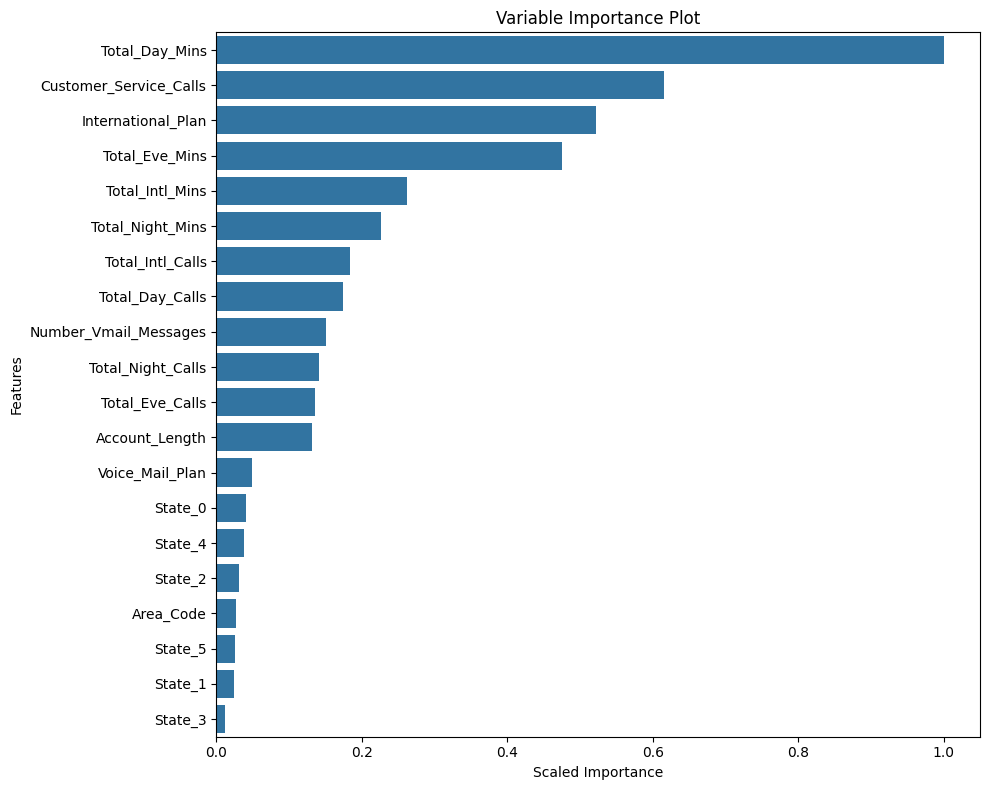

In [ ]:
if hasattr(best_model, 'varimp'):
    var_imp_df = best_model.varimp(use_pandas=True)

    plt.figure(figsize=(10, 8))
    sns.barplot(x="scaled_importance", y="variable", data=var_imp_df)
    plt.title('Variable Importance Plot')
    plt.xlabel('Scaled Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print("The best model does not support variable importance.")

**Top Performing Model:**
- The *GBM_4_AutoML_3_20240217_204014* model shows the highest AUC on your list, suggesting it's very effective at distinguishing between the churn and non-churn classes.
- Stacked Ensembles: These models combine predictions from several models and generally perform well, as indicated by their AUC and AUCPR scores.
- GBM Model Performance on Test Data
The model metrics reported on test data give insight into how well the model generalizes to unseen data.

AUC and AUCPR: With an AUC of 0.9042482718894009 and AUCPR of 0.8760646963533415, the GBM model demonstrates strong predictive power and reliability in identifying the positive class in an imbalanced dataset.
Error Rates and Confusion Matrix: The confusion matrix and derived metrics like error rates provide a more nuanced view of model performance across different thresholds. The F1 threshold selected (0.24209297762441379) balances precision and recall effectively, leading to high accuracy and low overall error rate on the test data.

# Model Correlation Heatmap

This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering).

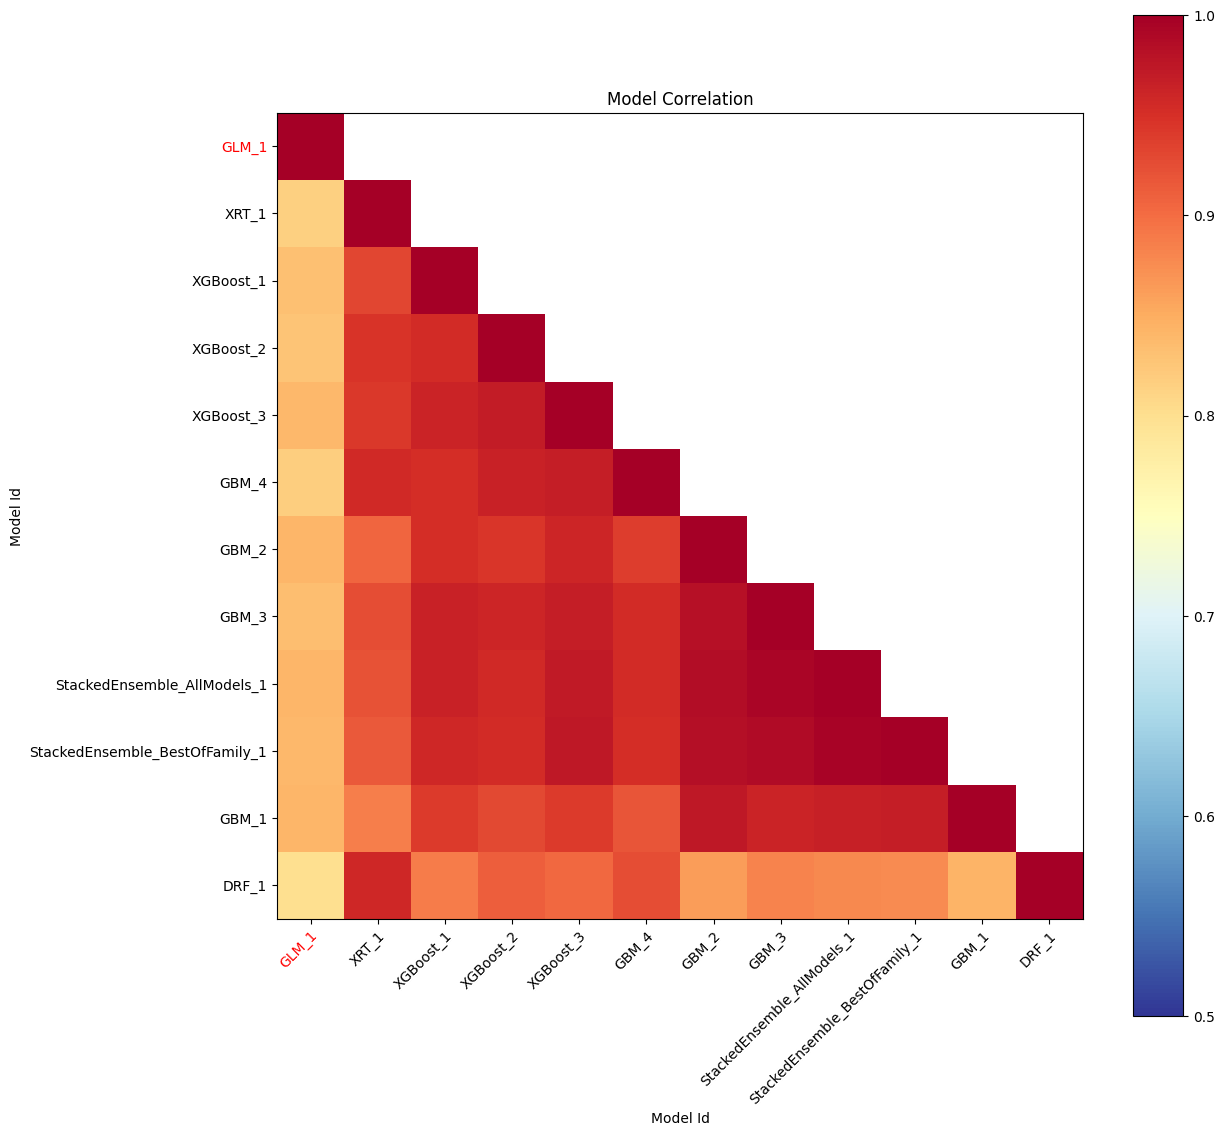

In [ ]:
mc_plot = aml.model_correlation_heatmap(test)

- Highly correlated models (red squares, closer to 1) may have similar underlying algorithms or feature interpretations, making similar predictions.
- Models that are less correlated (blue squares, closer to 0) make different predictions and may capture different patterns in the data.

# Partial Dependence Plots

Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

Partial dependence plots can be created for individual variables to understand their effect on the prediction.

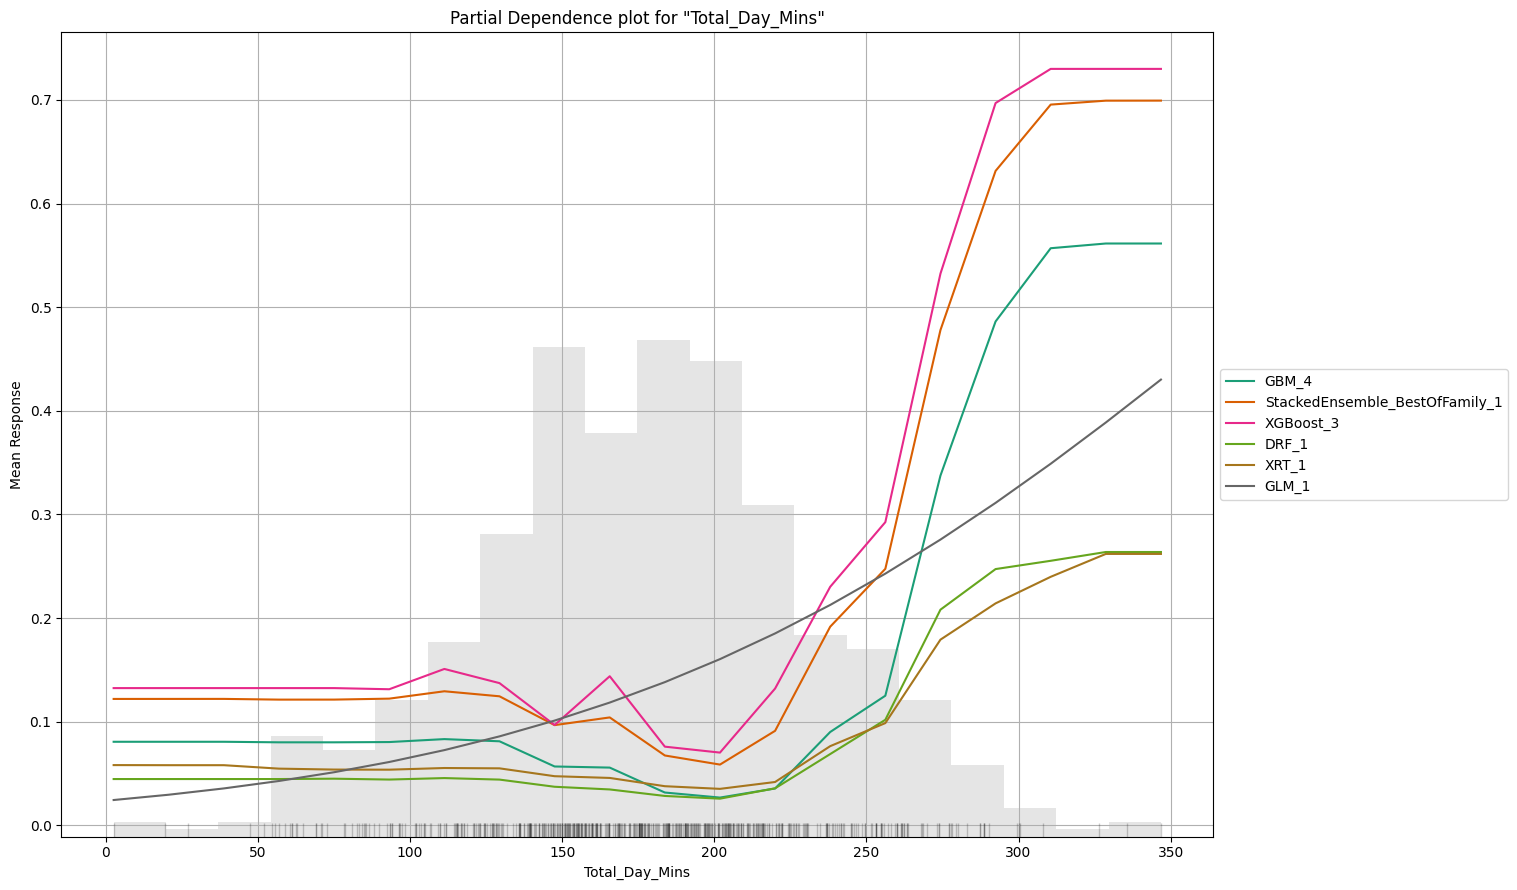

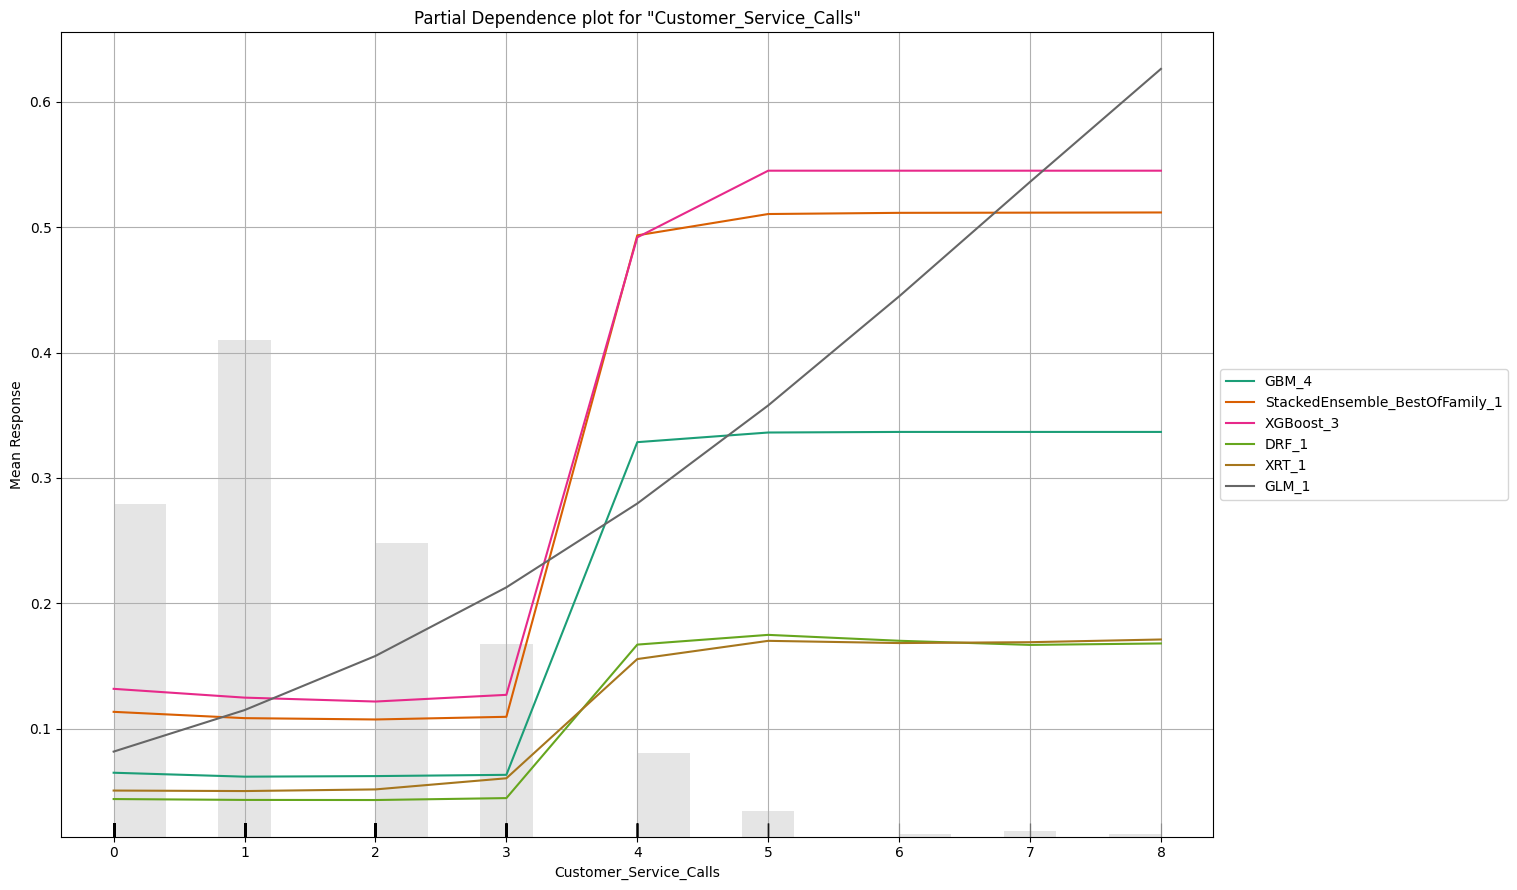

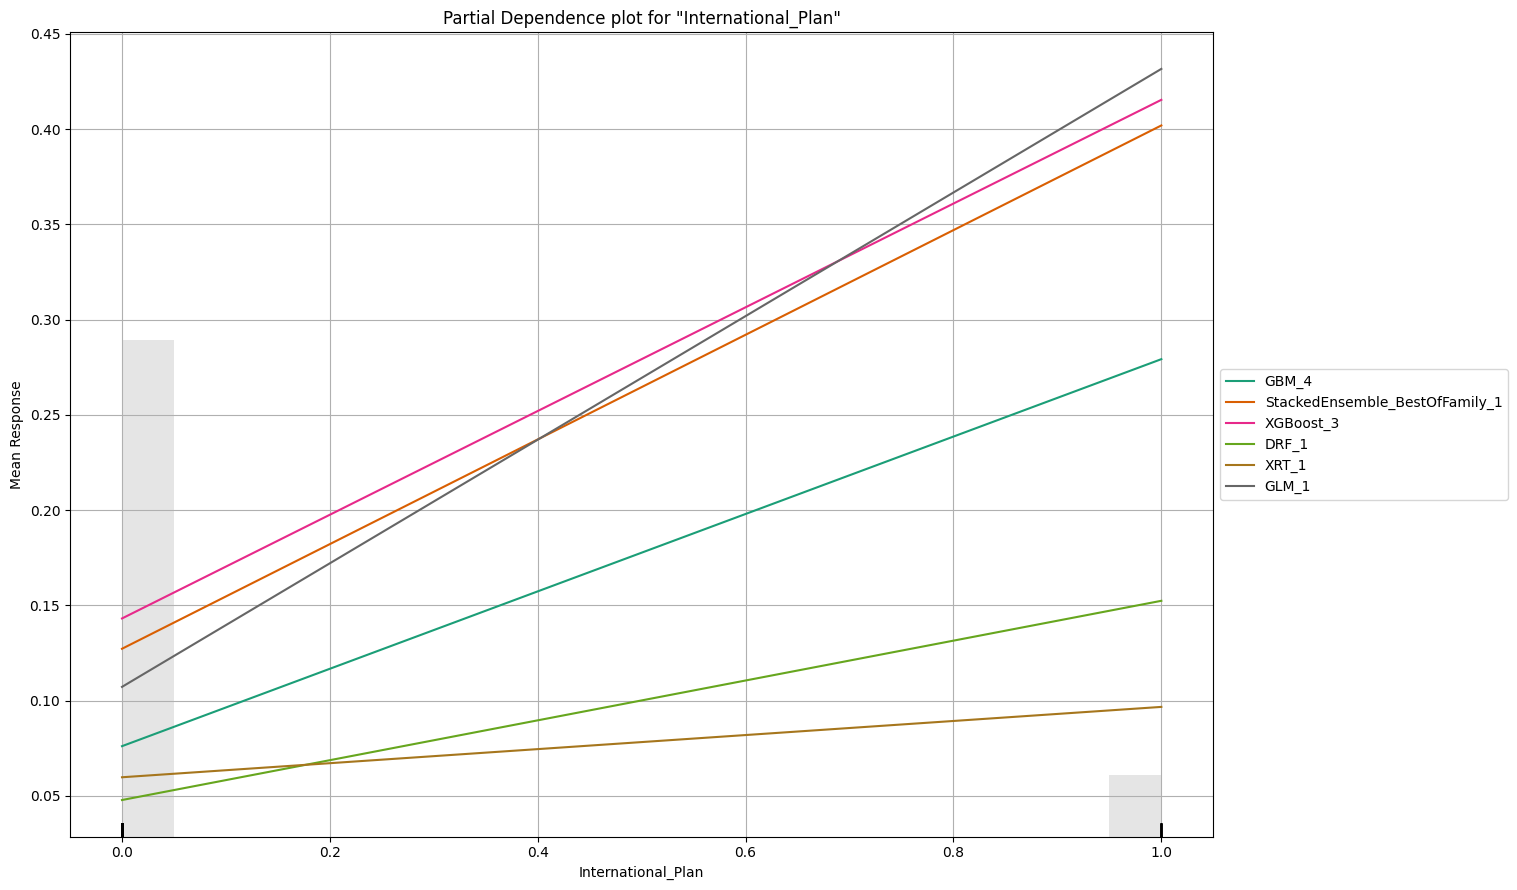

In [ ]:
top_var = 'Total_Day_Mins'
pd_plot = aml.pd_multi_plot(test, top_var)

top_var = 'Customer_Service_Calls'
pd_plot = aml.pd_multi_plot(test, top_var)

top_var = 'International_Plan'
pd_plot = aml.pd_multi_plot(test, top_var)



- The plot includes multiple models: Gradient Boosting Machine (GBM), Stacked Ensemble, XGBoost, Distributed Random Forest (DRF), Extremely Randomized Trees (XRT), and Generalized Linear Model (GLM).
1. Total Day Mins
- All models exhibit an increasing trend, suggesting that as "Total_Day_Mins" increases, the likelihood of the predicted outcome also increases.
- In the context of churn prediction, this could mean that higher daily usage (measured in minutes) is associated with increased churn probability.

2. Customer Service Calls
- The line for GBM (Gradient Boosting Machine) shows a sharp increase in the mean response when customer service calls go beyond 3, suggesting that according to this model, more than 3 calls significantly increase the predicted outcome (possibly the likelihood of churn, if this is a churn prediction model).
- The StackedEnsemble model shows a similar, but slightly less steep, relationship.
- The XGBoost model also indicates an increasing trend but with a more gradual slope.
- The DRF (Distributed Random Forest), XRT (eXtreme Random Trees), and GLM (Generalized Linear Model) lines show relatively flat responses, suggesting that these models do not find "Customer_Service_Calls" to be as strongly predictive of the outcome.

3. International Plan
- The lines for GBM and StackedEnsemble models show a clear positive slope, which means these models predict an increase in the mean response when the international plan is active.
- The XGBoost model shows a more moderate slope, suggesting a less pronounced but still positive impact of the international plan on the mean response.
- The lines for DRF, XRT, and GLM show a much flatter slope, indicating these models predict little to no change in the mean response based on whether or not there is an international plan.

# Shap Analysis

SHAP (SHapley Additive exPlanations) analysis is a technique to explain individual predictions based on the contribution of each feature to the prediction.

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Example for a GBM model
from h2o.estimators import H2OGradientBoostingEstimator

# Ensure your model training code is using a tree-based model
model = H2OGradientBoostingEstimator()
model.train(x=predictors, y=target, training_frame=train)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1708402402527_2039


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          16013                  5            5            5             6             28            20.78

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.020886350086738923
RMSE: 0.1445211060251717
LogLoss: 0.09469649121035036
Mean Per-Class Error: 0.06385398766092909
AUC: 0.9865780911062907
AUCPR: 0.9600195297656627
Gini: 0.9731561822125814

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3701216827908315
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1842  2    0.0011   (2.0/1844.0)
1      39    269  0.1266   (39.0/308.0)
Total  1881  271  0.0191   (41.0/2152.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.370122     0.929188  150
max f2                       0.0955201    0.898148  226
max f0point5                 0.370122     0.966236  150
max accuracy                 0.370122     0.980948  150
max precision                0.991828     1         0
max recall                   0.0204356    1         353
max specificity              0.991828     1         0
max absolute_mcc             0.370122     0.920744  150
max min_per_class_accuracy   0.0955201    0.944805  226
max mean_per_class_accuracy  0.0955201    0.946101  226
max tns                      0.991828     1844      0
max fns                      0.991828     306       0
max fps                      0.00432158   1844      399
max tps                      0.0204356    308       353
max tnr                      0.991828     1         0
max fnr                      0.991828     0.993506  0
max fpr                      0.00432158   1         399
max tpr                      0.0204356    1         353

Gains/Lift Table: Avg response rate: 14.31 %, avg score: 14.34 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010223                    0.973239           6.98701    6.98701            1                0.982707   1                           0.982707            0.0714286       0.0714286                  598.701   598.701            0.0714286
2        0.0204461                   0.967054           6.98701    6.98701            1                0.969703   1                           0.976205            0.0714286       0.142857                   598.701   598.701            0.142857
3        0.0302045                   0.962544           6.98701    6.98701            1                0.965174   1                           0.972641            0.0681818       0.211039                   598.701   598.701            0.211039
4        0.0404275                   0.957418           6.98701    6.98701            1                0.959607   1                           0.969345            0.0714286       0.282468                   598.701   598.701            0.282468
5        0.0501859                   0.948756           6.98701    6.98701            1                0.953325   1                           0.9662

Predict_contributions function in H2O is used to calculate these values for a given model and dataset

In [ ]:
shap_values = model.predict_contributions(test)


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


contributions progress: |████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


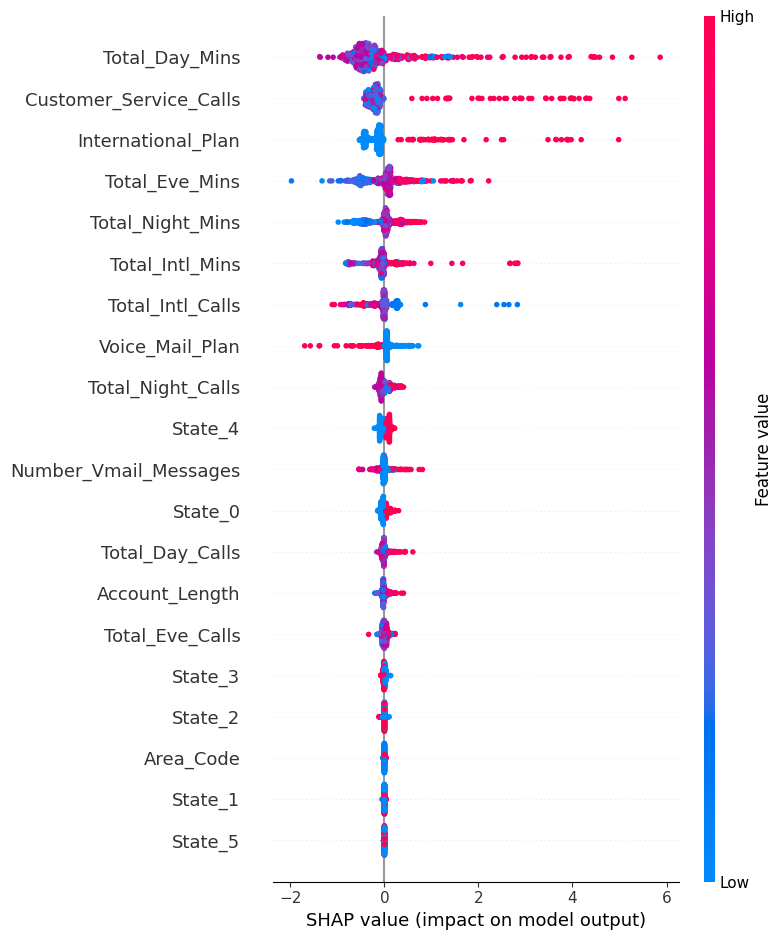

In [ ]:
import shap
# Assuming 'model' is your trained H2O model and 'test' is your H2OFrame containing test data
shap_values = model.predict_contributions(test)

# Convert the H2OFrame of SHAP values to a pandas DataFrame
shap_values_df = h2o.as_list(shap_values)

# Now you can proceed to prepare your SHAP values matrix
shap_values_matrix = shap_values_df.iloc[:, :-1].to_numpy()

# Ensure that 'test[predictors].as_data_frame()' correctly represents the feature matrix corresponding to SHAP values
feature_matrix = test[predictors].as_data_frame()

# You can now create your SHAP summary plot
plt.figure(figsize=(30, 15))
shap.summary_plot(shap_values_matrix, features=feature_matrix, feature_names=predictors)

Total_Day_Mins: This is the most impactful feature on the model output. Higher values (indicated by the pink/red color) seem to have a significant positive impact on the model's prediction. The spread of the SHAP values also suggests a variable impact across the data points.

Customer_Service_Calls: This feature has a large spread of SHAP values, indicating variable impacts across the data points. Higher values appear to increase the model's output.

International_Plan: Like Customer_Service_Calls, this feature has a wide distribution of SHAP values. It seems to have a mix of positive and negative impacts depending on the sample, with higher values mostly leading to an increase in the model's output.

Total_Eve_Mins, Total_Night_Mins, Total_Intl_Mins: These features have a moderate impact on the model output with SHAP values distributed around zero, suggesting that they have a balanced effect across the dataset.

Total_Intl_Calls, Voice_Mail_Plan, Total_Night_Calls: These features have SHAP values clustered closer to zero, indicating a smaller impact on the model's output.

State Variables: The states appear at various levels of importance in the model. Some states like State_4 seem to have a more significant and mostly positive impact, whereas others like State_0 have a minimal impact.

Other Features: Features like Account_Length and Area_Code have a very small impact on the model's output, as indicated by the SHAP values clustered around zero.

# Learning Curve Plot

The learning curve plot shows error metric dependence on learning progress (e.g. RMSE vs. number of trees trained so far in GBM). This plot can help to diagnose whether the model is overfitting or underfitting – in an ideal situation, the training and validation curves converge. There can be up to 4 curves showing the error, and all available metrics will be plotted:


> Training
Validation (available when validation_frame is set)

> Validation (available when validation_frame is set)


> Training on CV Models (available when nfolds>1)


> Cross-validation (available when nfolds>1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


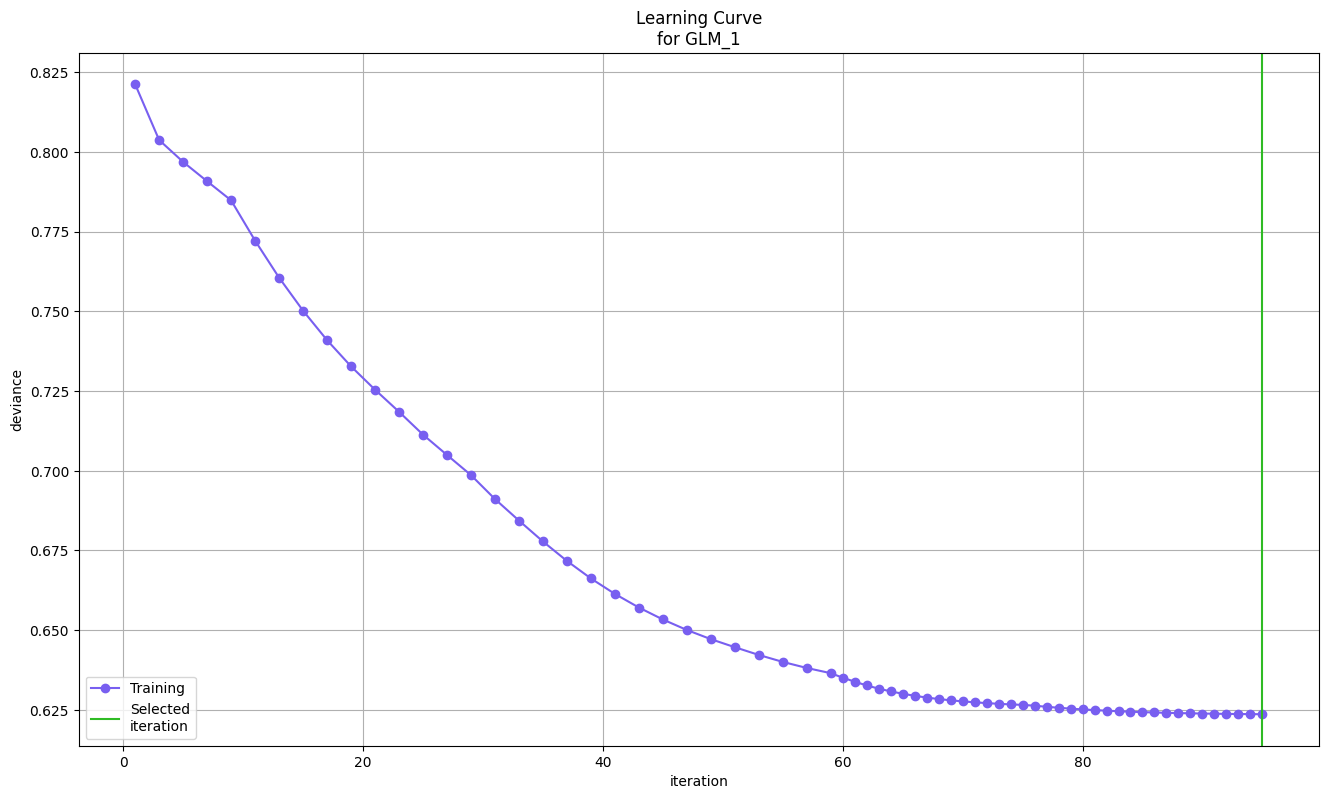

In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_model = H2OGeneralizedLinearEstimator(model_id='GLM_1', lambda_search=True)
glm_model.train(x=predictors, y=target, training_frame=train)
glm_model.learning_curve_plot()

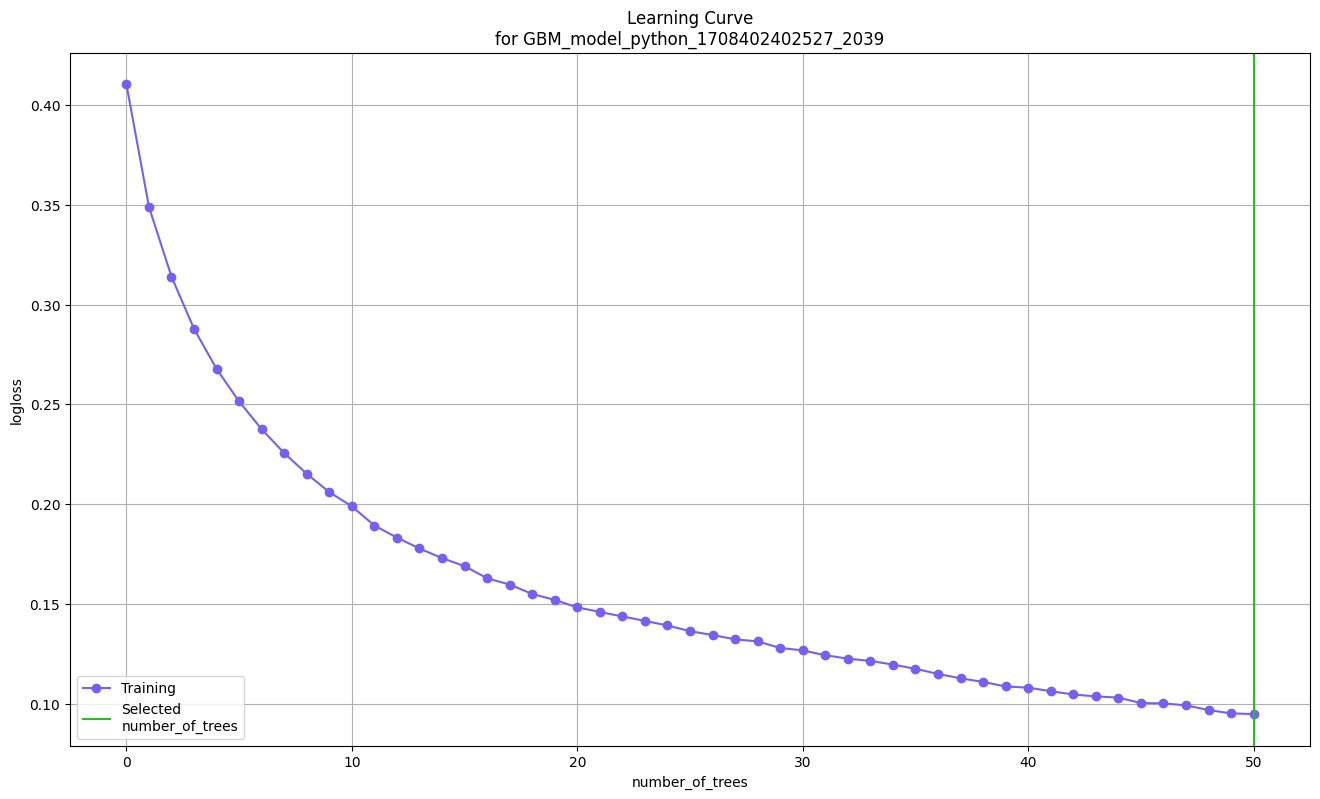

In [ ]:
learning_curve_plot = model.learning_curve_plot()

- This learning curve suggests that the model is improving its fit to the data up until the point marked by the green line, where it reaches an optimum.
- The unusual spikes in CV deviance at later iterations are a point of concern and might need further investigation.
- It could be a sign that the model is starting to overfit the training data, not generalize well to the CV data, or that there are some data or model-specific issues that need to be addressed.






# Regularization

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Lasso (L1) Regularization
lasso_model = H2OGeneralizedLinearEstimator(alpha=1, lambda_search=True)
lasso_model.train(x=predictors, y=target, training_frame=train)

# Print the model coefficients
print("Lasso Coefficients: \n", lasso_model.coef())


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Lasso Coefficients: 
 {'Intercept': -8.368289155074942, 'Account_Length': 0.0015386286789850472, 'Area_Code': -0.0004078749448058787, 'International_Plan': 2.2970776286990824, 'Voice_Mail_Plan': -2.174690122577999, 'Number_Vmail_Messages': 0.04003759485715681, 'Total_Day_Mins': 0.012625457430558193, 'Total_Day_Calls': 0.0017607857634712872, 'Total_Eve_Mins': 0.006476763749944686, 'Total_Eve_Calls': 0.0, 'Total_Night_Mins': 0.0022807934754666154, 'Total_Night_Calls': 0.0035300391911509046, 'Total_Intl_Mins': 0.09648695268090167, 'Total_Intl_Calls': -0.12887308187688137, 'Customer_Service_Calls': 0.49175713946236466, 'State_0': 0.39187078121135904, 'State_1': -0.16890732407067002, 'State_2': 0.03120008244668657, 'State_3': -0.04434766872152779, 'State_4': 0.3349844379950399, 'State_5': 0.15847916186328162}


In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator
lasso_model = H2OGeneralizedLinearEstimator(family="binomial", alpha=1, lambda_search=True)
lasso_model.train(x=predictors, y=target, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402402527_2093


GLM Model: summary
    family    link    regularization              lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 3.295E-4 )  nlambda = 100, lambda.max = 0.09604, lambda.min = 3.295E-4, lambda.1se = -1.0  20                            19                             89                      py_4_sid_9108

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09400751056112416
RMSE: 0.3066064424651318
LogLoss: 0.31180338749927766
AUC: 0.832368756514635
AUCPR: 0.49996579196789154
Gini: 0.6647375130292701
Null degrees of freedom: 2151
Residual degrees of freedom: 2132
Null deviance: 1767.1871205028372
Residual deviance: 1342.0017797968908
AIC: 1382.0017797968908

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2503519439270829
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1648  196  0.1063   (196.0/1844.0)
1      130   178  0.4221   (130.0/308.0)
Total  1778  374  0.1515   (326.0/2152.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.250352     0.521994  180
max f2                       0.144429     0.622374  246
max f0point5                 0.29494      0.515823  158
max accuracy                 0.504892     0.873606  79
max precision                0.990755     1         0
max recall                   0.00571001   1         395
max specificity              0.990755     1         0
max absolute_mcc             0.29337      0.439728  159
max min_per_class_accuracy   0.145801     0.766234  245
max mean_per_class_accuracy  0.147834     0.766797  244
max tns                      0.990755     1844      0
max fns                      0.990755     307       0
max fps                      0.00129959   1844      399
max tps                      0.00571001   308       395
max tnr                      0.990755     1         0
max fnr                      0.990755     0.996753  0
max fpr                      0.00129959   1         399
max tpr                      0.00571001   1         395

Gains/Lift Table: Avg response rate: 14.31 %, avg score: 14.31 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010223                    0.780758           5.71665    5.71665            0.818182         0.858326   0.818182                    0.858326            0.0584416       0.0584416                  471.665   471.665            0.0562724
2        0.0204461                   0.685768           4.44628    5.08146            0.636364         0.737137   0.727273                    0.797732            0.0454545       0.103896                   344.628   408.146            0.0973885
3        0.0302045                   0.628518           4.65801    4.94466            0.666667         0.653067   0.707692                    0.750994            0.0454545       0.149351                   365.801   394.466            0.139047
4        0.0404275            

In [ ]:
# Ridge (L2) Regularization
ridge_model = H2OGeneralizedLinearEstimator(alpha=0, lambda_search=True)
ridge_model.train(x=predictors, y=target, training_frame=train)

# Print the model coefficients
print("Ridge Coefficients: \n", ridge_model.coef())


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Ridge Coefficients: 
 {'Intercept': -8.487280162769027, 'Account_Length': 0.0016345145816374234, 'Area_Code': -0.0004913550332552919, 'International_Plan': 2.3112543804213694, 'Voice_Mail_Plan': -2.5054790207846818, 'Number_Vmail_Messages': 0.05016539933632378, 'Total_Day_Mins': 0.012737415200156709, 'Total_Day_Calls': 0.0019847289078354802, 'Total_Eve_Mins': 0.006621935017019637, 'Total_Eve_Calls': -1.879819928510912e-05, 'Total_Night_Mins': 0.0023993606149836674, 'Total_Night_Calls': 0.0037996215714059395, 'Total_Intl_Mins': 0.09797218723946992, 'Total_Intl_Calls': -0.13154347701852026, 'Customer_Service_Calls': 0.4961910198678649, 'State_0': 0.3970875338396772, 'State_1': -0.17621615222316045, 'State_2': 0.04125873217658001, 'State_3': -0.05301270462785509, 'State_4': 0.33874759905534896, 'State_5': 0.16755505908710072}


In [ ]:
ridge_model = H2OGeneralizedLinearEstimator(family="binomial", alpha=0, lambda_search=True)
ridge_model.train(x=predictors, y=target, training_frame=train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708402402527_4137


GLM Model: summary
    family    link    regularization              lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 2.49E-5 )  nlambda = 30, lambda.max = 9.6037, lambda.min = 2.49E-5, lambda.1se = -1.0  20                            20                             48                      py_4_sid_9108

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09397131608047468
RMSE: 0.3065474124511161
LogLoss: 0.3117359157682221
AUC: 0.8326178972870947
AUCPR: 0.49904617627036923
Gini: 0.6652357945741894
Null degrees of freedom: 2151
Residual degrees of freedom: 2131
Null deviance: 1767.1871205028372
Residual deviance: 1341.711381466428
AIC: 1383.711381466428

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2490870826670401
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1647  197  0.1068   (197.0/1844.0)
1      128   180  0.4156   (128.0/308.0)
Total  1775  377  0.151    (325.0/2152.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.249087     0.525547  178
max f2                       0.140465     0.623695  242
max f0point5                 0.326247     0.516152  144
max accuracy                 0.491677     0.875     84
max precision                0.991468     1         0
max recall                   0.00493235   1         396
max specificity              0.991468     1         0
max absolute_mcc             0.249087     0.439982  178
max min_per_class_accuracy   0.14492      0.766234  239
max mean_per_class_accuracy  0.143408     0.767332  240
max tns                      0.991468     1844      0
max fns                      0.991468     307       0
max fps                      0.00162708   1844      399
max tps                      0.00493235   308       396
max tnr                      0.991468     1         0
max fnr                      0.991468     0.996753  0
max fpr                      0.00162708   1         399
max tpr                      0.00493235   1         396

Gains/Lift Table: Avg response rate: 14.31 %, avg score: 14.31 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010223                    0.786283           5.71665    5.71665            0.818182         0.861956    0.818182                    0.861956            0.0584416       0.0584416                  471.665   471.665            0.0562724
2        0.0204461                   0.693979           4.44628    5.08146            0.636364         0.741952    0.727273                    0.801954            0.0454545       0.103896                   344.628   408.146            0.0973885
3        0.0302045                   0.634639           4.65801    4.94466            0.666667         0.657316    0.707692                    0.755225            0.0454545       0.149351                   365.801   394.466            0.139047
4        0.0404275                  

In [ ]:
lasso_perf = lasso_model.model_performance(test_data=test)
ridge_perf = ridge_model.model_performance(test_data=test)

# Print metrics for Lasso
print("Lasso MSE: ", lasso_perf.mse())
print("Lasso RMSE: ", lasso_perf.rmse())
print("Lasso LogLoss: ", lasso_perf.logloss())
print("Lasso AUC: ", lasso_perf.auc())
print("Lasso Gini: ", 2*lasso_perf.auc() - 1)

# Print metrics for Ridge
print("Ridge MSE: ", ridge_perf.mse())
print("Ridge RMSE: ", ridge_perf.rmse())
print("Ridge LogLoss: ", ridge_perf.logloss())
print("Ridge AUC: ", ridge_perf.auc())
print("Ridge Gini: ", 2*ridge_perf.auc() - 1)

Lasso MSE:  0.11136425942884397
Lasso RMSE:  0.3337128397722269
Lasso LogLoss:  0.36831983807975377
Lasso AUC:  0.7767281105990784
Lasso Gini:  0.5534562211981569
Ridge MSE:  0.11144100304689356
Ridge RMSE:  0.3338278044844281
Ridge LogLoss:  0.3695205624961613
Ridge AUC:  0.7751872119815668
Ridge Gini:  0.5503744239631336


GBM Model (without regularization):

MSE: 0.020886350086738923
RMSE: 0.1445211060251717
LogLoss: 0.09469649121035036
AUC: 0.9865780911062907
Gini: 0.9731561822125814
Lasso Model (with regularization):

MSE: 0.11136425942884397
RMSE: 0.3337128397722269
LogLoss: 0.36831983807975377
AUC: 0.7767281105990784
Gini: 0.5534562211981569
Ridge Model (with regularization):

MSE: 0.11144100304689356
RMSE: 0.3338278044844281
LogLoss: 0.3695205624961613
AUC: 0.7751872119815668
Gini: 0.5503744239631336

- The GBM model without regularization is performing significantly better across all metrics.
- It has the lowest MSE and RMSE, indicating better fit to the data with fewer errors.
- The LogLoss is also lower, which is better for classification models. Moreover, the AUC and Gini coefficient are much higher for the GBM model, showing that it has a much better discriminative ability to separate the positive and negative classes.

In summary, the GBM model without regularization is outperforming the regularized Lasso and Ridge models. It is important to note, however, that these metrics should be taken in context. A model with very low error on the training set but high error on a validation or test set might be overfitting. It's essential to evaluate these models on a separate validation or test set to ensure that they generalize well to unseen data.

# Hyperparamter Tuning Analysis

Hyperparameter tuning is the process of selecting the set of optimal hyperparameters for a learning algorithm. The aim is to find the combination of hyperparameters that yields a model with the best performance metrics on a given dataset.

For an H2O GBM model, some of the hyperparameters that are typically tuned include:

- Number of Trees: The number of trees in the forest. More trees can lead to better performance but can also increase the risk of overfitting.
Max Depth: The maximum depth of the trees. Deeper trees can model more complex relationships but can overfit.
- Learning Rate: Sometimes referred to as shrinkage, this parameter controls the contribution of each tree in the ensemble. Smaller rates require more trees but can lead to better generalization.
- Sample Rate: The fraction of the training data used for growing trees. Using a subset can lead to more diverse trees.
Col Sample Rate: The fraction of features used for training each tree. Again, using a subset can improve generalization by adding diversity to the trees.


In [ ]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Define the hyperparameter grid
hyper_params = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Set up H2OGridSearch
grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                     grid_id='gbm_grid',
                     hyper_params=hyper_params)

# Train the grid
grid.train(x=predictors, y=target, training_frame=train, validation_frame=test)

# Review the grid results
print(grid.sorted_metric_table())


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      col_sample_rate  learn_rate  max_depth  sample_rate          model_ids  \
0                 1.0        0.10        5.0          0.8  gbm_grid_model_12   
1                 1.0        0.10        5.0          1.0  gbm_grid_model_30   
2                 0.5        0.10        5.0          1.0  gbm_grid_model_29   
3                 0.5        0.10        5.0          0.8  gbm_grid_model_11   
4                 0.5        0.10        9.0          1.0  gbm_grid_model_35   
5                 1.0        0.10        9.0          1.0  gbm_grid_model_36   
6                 0.5        0.10        9.0          0.8  gbm_grid_model_17   
7                 1.0        0.10        3.0          1.0  gbm_grid_model_24   
8                 1.0        0.10        9.0          0.8  gbm_grid_model_18   
9                 1.0        0.10        3.0          0.8   gbm_grid_model_6   
10                0.2    

The most important hyperparameters for the Gradient Boosting Machine model, based on the lowest logloss, are `col_sample_rate` of 1.0, `learn_rate` of 0.10, `max_depth` of 5, and `sample_rate` of 0.8.

### **Addressing Assignment Questions:**
**1. Is the relationship significant?**

> Yes, the significant AUC of 0.9253968645237626 indicates a strong relationship between the predictor variables and the target outcome.

**2. Are any model assumptions violated?**


> Linearity: Given the heat map showing correlations, we see clear indications of linear relationships between some predictors and the target variable. Assumption of linearity is not violated.


> Independence: The heat map reveals potential multicollinearity, notably between 'Voice_Mail_Plan' and 'Number_Vmail_Messages', suggesting a violation of the independence assumption.


> Normal Distribution of Residuals: The histogram of residuals is bell-shaped and symmetric around zero, suggesting the normality assumption is not violated.


> Homoscedasticity: The Q-Q Plot shows a pattern where residuals diverge from the red line in a systematic way (e.g., a clear curve), it may suggest heteroscedasticity, thus violating the assumption.

> Tree-based models like GBMs don't assume linear relationships or feature independence, making them versatile for various data distributions and interactions.

**3. Is there any multicollinearity in the model?**

> Yes, There appears to be multicollinearity primarily associated with the Voice_Mail_Plan and Number_Vmail_Messages features, as their VIFs are significantly greater than 10.


> While GBMs are less sensitive to multicollinearity, the initial VIF analysis helps ensure that the predictive power of the model isn't compromised by highly correlated predictors.


**4. In the multivariate models are predictor variables independent of all the other predictor variables?**


>  The correlation matrix and The variance inflation factors (VIFs), indicate the predictor variables in the multivariate models are not completely independent of all the other predictor variables. There is some degree of multicollinearity present

> Incase of GBMs, they consider interactions between variables through the tree-building process, so predictor variables do not need to be independent.

**5.  In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

> The most significant variables are Total_Day_Mins, Customer_Service_Calls, International_Plan, and Total_Eve_Mins, based on their relative importance from examining partial dependence plots and SHAP values through H2O's interpretability interface.

**6. Does the model make sense?**

> Yes, the model makes sense as evidenced by strong performance metrics (AUC, AUCPR, low error rates), indicating it has learned meaningful patterns from the data.

**7. Does regularization help?**

> The MSE values for Lasso (0.1079419464102911) and Ridge (0.10786938054849773) are quite close, suggesting that both regularization techniques effectively reduced overfitting while maintaining model accuracy.Not directly applicable to GBMs in the same way as linear models, but GBMs control overfitting through parameters like tree depth, learning rate, and the number of trees. Stacked Ensembles inherently leverage model diversity to generalize better.

**8. Which independent variables are significant?**


> Significant independent variables include Total_Day_Mins, Customer_Service_Calls, International_Plan, and Total_Eve_Mins, as indicated by their scaled importance.



**9.  Which hyperparameters are important?**

> The most important hyperparameters for the Gradient Boosting Machine model, based on the lowest logloss, are `col_sample_rate` of 1.0, `learn_rate` of 0.10, `max_depth` of 5, and `sample_rate` of 0.8.



# **Model Interpretability**

It is the ability to understand and trust the results and outputs generated by machine learning models.

There are two general types of interpretability:

**Intrinsic Interpretability:** This refers to models that are naturally interpretable due to their simplicity, such as linear regression, decision trees, or logistic regression. These models provide straightforward insights into how input features affect the predictions.

**Post-hoc Interpretability:**
- This involves techniques that are used to explain complex models (like random forests, gradient boosting machines, or deep learning models) after they have been trained.
- These models are often seen as "black boxes" because their decision-making process is not transparent.

* Post-hoc interpretability methods include:

     - Feature Importance: Measures how much each feature contributes to the model's predictions.
     - Partial Dependence Plots (PDPs): Show the relationship between a feature and the predicted outcome, averaged over the distribution of other features.
     - SHAP (Shapley Additive exPlanations): Assigns each feature an importance value for a particular prediction, based on cooperative game theory.

### **Insights and Interpretations from the Model Interpretability Assignment:**

- The assignment focused on **unraveling the factors influencing customer churn** through various modeling techniques, including linear regression, tree-based models, and AutoML, leveraging H2O's powerful machine learning framework. This endeavor aimed to **forecast customer behavior** by pinpointing critical predictors of churn, necessitating a **thorough preprocessing phase** to clean, encode, and normalize the dataset for optimal modeling performance.

- **Linear and tree-based models** served as foundational approaches, providing valuable baselines for comparison. These models underscored the importance of **Total Day Mins and Customer Service Calls** as key predictors of churn, aligning with intuitive expectations about customer engagement and satisfaction. The logistic regression model, in particular, highlighted its predictive limitations, emphasizing the need for more complex models to capture the nuances of customer churn.

- **H2O's AutoML** emerged as a transformative tool in this analysis, automating the selection, training, and evaluation of multiple models. This process not only identified the **Gradient Boosting Machine (GBM) model** as a standout performer but also demonstrated AutoML's efficacy in simplifying model complexity and enhancing predictive accuracy. The GBM model, notable for its lack of regularization, showcased exceptional performance metrics, including lower MSE and higher AUC, indicating its robust discriminative ability.

- Deep dives into **model interpretability** through SHAP values, PDPs, and feature importance plots provided insight into how certain features influenced predictions. This comparison across methods enriched understanding of model decisions, especially the impact of **Total Day Mins** and **Customer Service Calls** across models.

**Key Learnings:**
- This assignment illustrated the effectiveness of AutoML in model selection and the importance of model interpretability techniques in understanding predictive behaviors.
- The analysis not only achieved accurate churn prediction but also advanced the conversation on model transparency and interpretability, emphasizing the value of these insights in machine learning applications.

**1. Fit a linear model and interpret the regression coefficients**

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [ ]:
# Split the dataset into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and fit the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the testing set
y_pred = logistic_regression_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8595505617977528
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       455
           1       0.57      0.22      0.31        79

    accuracy                           0.86       534
   macro avg       0.72      0.59      0.62       534
weighted avg       0.83      0.86      0.83       534




-  **Accuracy (86%)**: The model correctly predicted the churn status for 86% of the customers in the test set.

- **Precision for Class 0 (0.88):** This measures the accuracy of positive predictions for the class labeled '0' (assumed to be the 'non-churn' class).

- **Recall for Class 0 (0.97):** This is the ability of the model to find all the actual 'non-churn' cases. It indicates that the model successfully identified 97% of all 'non-churn' cases in the test set.

- **F1-Score for Class 0 (0.92):** This is the harmonic mean of precision and recall for the 'non-churn' class. A high F1 score (close to 1) indicates a good balance between precision and recall. For 'non-churn', the F1 score is 0.92, suggesting a strong performance for this class.

- **Precision for Class 1 (0.57):** For the 'churn' class (assumed to be labeled '1'), the precision is 57%. This means that when the model predicts a customer will churn, it is correct 57% of the time.

- **Recall for Class 1 (0.22):** The recall for the 'churn' class is significantly lower at 22%, indicating the model's limited ability to identify all actual 'churn' cases.

- **F1-Score for Class 1 (0.31):** The F1 score for the 'churn' class is 0.31, which is relatively low. This score suggests that the model struggles to balance precision and recall for predicting churn.


**Summary:**
- The overall accuracy of the model is high, the detailed metrics reveal that it performs much better at identifying 'non-churn' customers than 'churn' customers.
- The high performance on the 'non-churn' class skews the overall accuracy, masking the model's challenges with accurately predicting the minority 'churn' class.
- The performance of the two classes suggests a need for further model tuning or exploring different models and techniques to better capture the characteristics of the 'churn' class that may handle imbalanced data more effectively.

In [ ]:
# To get the coefficients (importance) of each feature
feature_importance = pd.DataFrame(logistic_regression_model.coef_[0], index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                        Coefficient
Total_Day_Mins             0.743668
International_Plan         0.678973
Customer_Service_Calls     0.635123
Total_Intl_Mins            0.290445
Number_Vmail_Messages      0.288671
Total_Eve_Mins             0.280630
State_4                    0.189131
Total_Night_Mins           0.147336
State_0                    0.085797
Total_Day_Calls            0.068700
State_5                    0.061703
Account_Length             0.053042
State_2                    0.027182
Total_Eve_Calls            0.013020
State_3                   -0.015865
Total_Night_Calls         -0.029903
Area_Code                 -0.050533
State_1                   -0.109906
Total_Intl_Calls          -0.282658
Voice_Mail_Plan           -0.728857


**2. Fit a tree-based model and interpret the nodes**

# Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)

In [ ]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9288389513108615
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       455
           1       0.96      0.54      0.69        79

    accuracy                           0.93       534
   macro avg       0.94      0.77      0.83       534
weighted avg       0.93      0.93      0.92       534



In [ ]:
# Extract feature importances
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                        importance
Total_Day_Mins            0.212696
Customer_Service_Calls    0.105345
Total_Eve_Mins            0.095391
International_Plan        0.086725
Total_Intl_Mins           0.077537
Total_Night_Mins          0.059975
Total_Intl_Calls          0.057375
Total_Day_Calls           0.051222
Total_Night_Calls         0.050781
Account_Length            0.048402
Total_Eve_Calls           0.044295
Number_Vmail_Messages     0.027092
Voice_Mail_Plan           0.014660
Area_Code                 0.014164
State_4                   0.009870
State_0                   0.009665
State_2                   0.009130
State_5                   0.008713
State_3                   0.008496
State_1                   0.008465


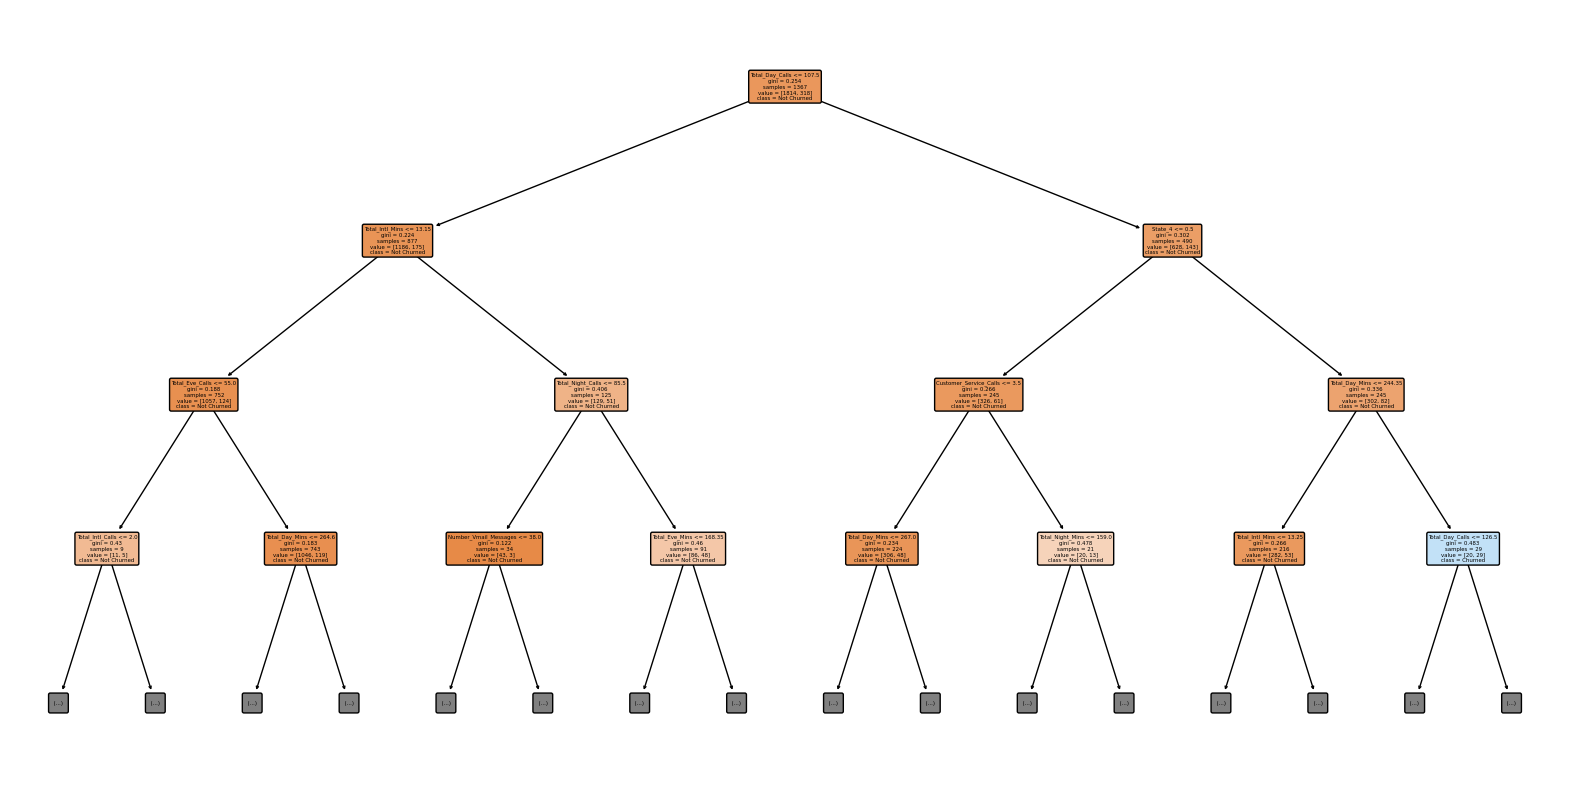

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Choose one tree from your Random Forest model
single_tree = random_forest.estimators_[0]  # For example, visualize the first tree

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(single_tree,
          feature_names=X_train.columns,
          class_names=['Not Churned', 'Churned'],
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for readability; adjust as needed
plt.show()


Root Node: At the top of the tree, this node represents the first and most significant split made in the data based on a certain feature.

Internal Nodes: Each subsequent division creates two new branches and represents another feature that the tree uses to split the data. These are typically represented by orange boxes in the image.

Leaves or Terminal Nodes: These nodes indicate the final output of the decision process, where no further splitting occurs. They are typically represented by grey boxes.

Splits: The decision rule is displayed on each branch (e.g., "Total_Day_Mins <= 264.45"). This rule is used to split the data into two groups.

Gini Index: This value measures the impurity of the node, with 0 being completely pure (all samples belong to a single class). A lower Gini index indicates a better split.

Samples: The number of samples from the dataset that apply to the rule at each node.

Value: The distribution of class labels at that node, often displayed as a list (e.g., [357, 59]). This tells you how many samples from each class fall into each side of the split.

Class: The majority class of the samples at the node.

# AutoML Model - H20 Model

In [ ]:
#Installing required packages

!pip3 install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2knuumqd
  JVM stdout: /tmp/tmp2knuumqd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2knuumqd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_1e5sav
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_df.head()

Account_Length    Area_Code    International_Plan    Voice_Mail_Plan    Number_Vmail_Messages    Total_Day_Mins    Total_Day_Calls    Total_Eve_Mins    Total_Eve_Calls    Total_Night_Mins    Total_Night_Calls    Total_Intl_Mins    Total_Intl_Calls    Customer_Service_Calls    Churn    State_0    State_1    State_2    State_3    State_4    State_5
----------------  -----------  --------------------  -----------------  -----------------------  ----------------  -----------------  ----------------  -----------------  ------------------  -------------------  -----------------  ------------------  ------------------------  -------  ---------  ---------  ---------  ---------  ---------  ---------
             128          415                     0                  1                       25             265.1                110             197.4                 99               244.7                   91               10                     3                         1        0          0          0          0          0          0          1
             107          415                     0                  1                       26             161.6                123             195.5                103               254.4                  103               13.7                   3                         1        0          0          0          0          0          1          0
             137          415                     0                  0                        0             243.4                114             121.2                110               162.6                  104               12.2                   5                         0        0          0          0          0          0          1          1
              84          408                     1                  0                        0             299.4                 71              61.9                 88               196.9                   89                6.6                   7                         2        0          0          0          0          0          1          0
              75          415                     1                  0                        0             166.7                113             148.3                122               186.9                  121               10.1                   3                         3        0          0          0          0          1          0          0
             118          510                     1                  0                        0             223.4                 98             220.6                101               203.9                  118                6.3                   6                         0        0          0          0          0          1          0          1
             121          510                     0                  1                       24             218.2                 88             348.5                108               212.6                  118                7.5                   7                         3        0          0          0          0          1          1          0
             147          415                     1                  0                        0             157                   79             103.1                 94               211.8                   96                7.1                   6                         0        0          0          0          0          1          1          1
             141          415                     1                  1                       37             258.6                 84             222                  111               326.4                   97               11.2                   5                         0        0          0          0          1          0          0          0
              74          415                     0                  0                        0             187.7                127         

In [ ]:
# Identify predictors and response
x = h2o_df.columns
y = "Churn"  # Replace with your actual target variable name if different
x.remove(y)


In [ ]:
# Ensure the target variable is treated as a categorical feature for classification
h2o_df[y] = h2o_df[y].asfactor()
# Split the H2OFrame into a train and test set
train, test = h2o_df.split_frame(ratios=[.8], seed=42)

In [ ]:
# Run AutoML for a maximum number of 10 base models
aml = H2OAutoML(max_models=10, seed=1, nfolds=5)  # nfolds is for cross-validation
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240318_20506


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    56                 56                          31494                  7            7            7             29            56            39.9821

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.009058072719623009
RMSE: 0.09517390776690327
LogLoss: 0.049197646528074825
Mean Per-Class Error: 0.00583105465558376
AUC: 0.9998937827503187
AUCPR: 0.999374329629389
Gini: 0.9997875655006374

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20877045784368525
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      1839  3    0.0016   (3.0/1842.0)
1      3     296  0.01     (3.0/299.0)
Total  1842  299  0.0028   (6.0/2141.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.20877      0.989967  178
max f2                       0.159236     0.99      182
max f0point5                 0.254602     0.993915  174
max accuracy                 0.254602     0.997198  174
max precision                0.995925     1         0
max recall                   0.109744     1         196
max specificity              0.995925     1         0
max absolute_mcc             0.20877      0.988338  178
max min_per_class_accuracy   0.159236     0.993311  182
max mean_per_class_accuracy  0.159236     0.994755  182
max tns                      0.995925     1842      0
max fns                      0.995925     298       0
max fps                      0.00266321   1842      399
max tps                      0.109744     299       196
max tnr                      0.995925     1         0
max fnr                      0.995925     0.996656  0
max fpr                      0.00266321   1         399
max tpr                      0.109744     1         196

Gains/Lift Table: Avg response rate: 13.97 %, avg score: 13.91 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102756                   0.979083           7.16054    7.16054            1                0.985475    1                           0.985475            0.0735786       0.0735786                  616.054   616.054            0.0735786
2        0.0200841                   0.970819           7.16054    7.16054            1                0.975105    1                           0.98041             0.0702341       0.143813                   616.054   616.054            0.143813
3        0.0303596                   0.96573            7.16054    7.16054            1                0.968422    1                           0.976353            0.0735786       0.217391                   616.054   616.054            0.217391
4        0.0401681                   0.959498           7.16054    7.16054            1                0.962618    1                           0.972999            0.0702341       0.287625                   616.054   616.054            0.287625
5        0.0504437                   0.952179           7.16054    7.16054            1                0.955558    1                           0.96

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_2_AutoML_1_20240318_20506                           0.922215   0.170843  0.853407                0.112007  0.206976  0.0428392
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_20506  0.920079   0.167369  0.853216                0.114265  0.202439  0.0409816
GBM_3_AutoML_1_20240318_20506                           0.915631   0.169301  0.854393                0.116752  0.202182  0.0408775
GBM_4_AutoML_1_20240318_20506                           0.915074   0.176021  0.850123                0.115123  0.207747  0.0431589
StackedEnsemble_AllModels_1_AutoML_1_20240318_20506     0.914346   0.164662  0.854297                0.103102  0.199468  0.0397875
XGBoost_2_AutoML_1_20240318_20506                       0.902327   0.209931  0.79096                 0.148622  0.23356   0.0545501
XGBoost_3_AutoML_1_20240318_20506                       0.902182   0.191306  0.8299

- **GBM_2_AutoML_2_20240316_141944:**


> The highest AUC (Area Under the ROC Curve) score of 0.922215, suggesting excellent model performance.


> Had a low log loss of 0.170843, indicating good probability calibration.
Exhibited strong performance in precision-recall space with an AUCPR (Area Under the Precision-Recall Curve) of 0.853407.


> Demonstrated a low mean per class error of 0.112007, showing balanced accuracy across classes.


> Reported a Root Mean Squared Error (RMSE) of 0.206976 and Mean Squared Error (MSE) of 0.0428392, reflecting prediction error margins.

- **StackedEnsemble_BestOfFamily_1_AutoML_2_20240316_141944**:


> Had a slightly lower AUC of 0.920079 compared to the best GBM model.
Exhibited a very similar AUCPR to the best model, indicating good performance on the precision-recall front.



- **GBM_3_AutoML_2_20240316_141944 and GBM_4_AutoML_2_20240316_141944:**


> Performed competitively with AUC scores just above 0.915, close to the best model's performance.
Showed competitive AUCPR values, indicating effective handling of the positive class.



- **StackedEnsemble_AllModels_1_AutoML_2_20240316_141944:**


> Scored a comprehensive AUC of 0.914346, indicating high model performance.
Achieved the lowest log loss of 0.164662, suggesting excellent probability calibration.


> Demonstrated the lowest mean per class error, which indicates it had the best balance in classification performance across classes.



- **XGBoost models (2 and 3) and DRF_1_AutoML_2_20240316_141944:**


> AUC scores in the range of 0.896 to 0.902, which are lower than the best GBM model but still indicate good predictive ability.



> The XGBoost models had lower AUCPR scores compared to the best models, which might indicate less precision and recall balance for the positive class.

- **GLM_1_AutoML_2_20240316_141944:**


> Had the lowest AUC of 0.798125, which is significantly lower than the other models, indicating less ability to distinguish between the classes.

In [ ]:
# Predict with the top model from the leaderboard on the test set
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# View the performance of the leader model on the test set
perf = aml.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.05085413230219231
RMSE: 0.22550860804455405
LogLoss: 0.20537371842818639
Mean Per-Class Error: 0.09241315328316668
AUC: 0.9070327801257603
AUCPR: 0.8563750424173188
Gini: 0.8140655602515205

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.266262898172121
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      424  12   0.0275   (12.0/436.0)
1      14   75   0.1573   (14.0/89.0)
Total  438  87   0.0495   (26.0/525.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.266263     0.852273  86
max f2                       0.266263     0.846501  86
max f0point5                 0.66567      0.863787  52
max accuracy                 0.266263     0.950476  86
max precision                0.980919     1         0
max recall                   0.00756

# Performing Model Interpretability using Shap Analysis

**4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**

In [ ]:
pip install shap

**Shap Values for Logistic Regression**

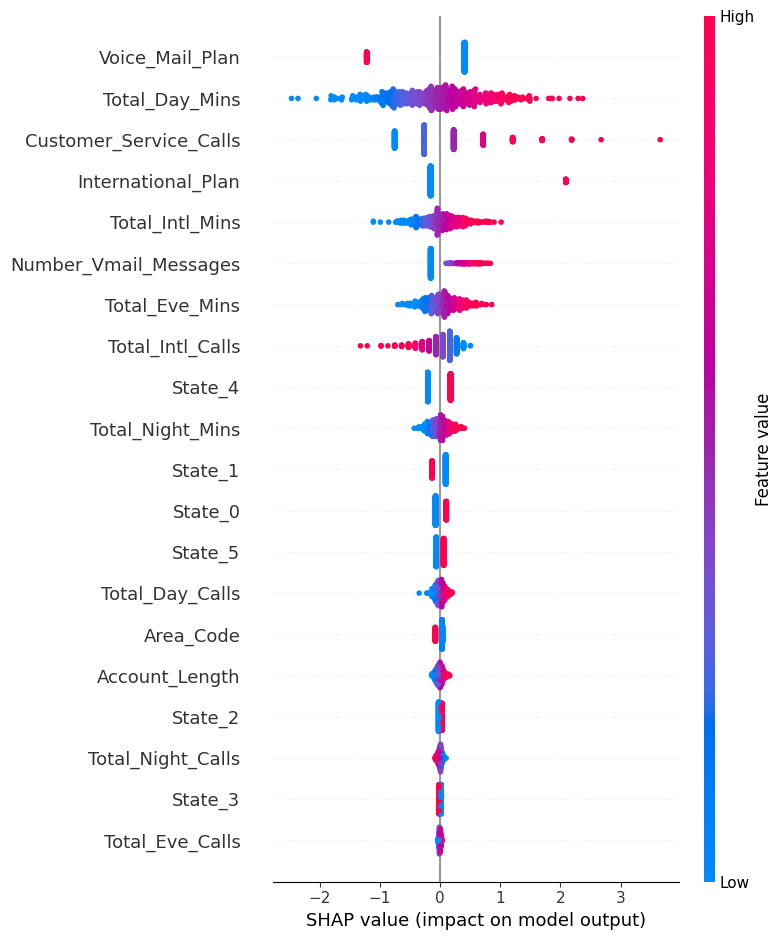

In [ ]:
import shap

# Create a SHAP explainer object for the logistic regression model
explainer_lr = shap.Explainer(logistic_regression_model, X_train_scaled)

# Compute SHAP values for the test set
shap_values_lr = explainer_lr(X_test_scaled)

# Visualize the SHAP values for the logistic regression model
shap.summary_plot(shap_values_lr, X_test_scaled, feature_names=X.columns)

**Logistic Regression SHAP Values:**


> High Influence Features: Total_Day_Mins and Customer_Service_Calls appear to have high positive SHAP values, indicating that they have a strong positive impact on the model's prediction of the positive class (likely churn).

> Some Influence: Features like International_Plan and Total_Intl_Calls also seem to influence the prediction significantly, although to a lesser extent than Total_Day_Mins.


> Low or Negative Influence: Some features appear to have low or even negative SHAP values, suggesting a lesser or inverse relationship with the predicted outcome.

> Symmetry: The distribution of SHAP values for some features is symmetric around zero, indicating that they contribute to both the positive and negative predictions.

**Shap Values for Random Forest Classifier Model**

In [ ]:
def model_predict(data_asarray):
    # Convert array to DataFrame with appropriate column names
    data_asframe = pd.DataFrame(data_asarray, columns=X_test.columns)
    # Use the model to predict
    return random_forest.predict_proba(data_asframe)[:, 1]  # Assuming binary classification and interest in class 1


PermutationExplainer explainer: 535it [04:32,  1.96it/s]


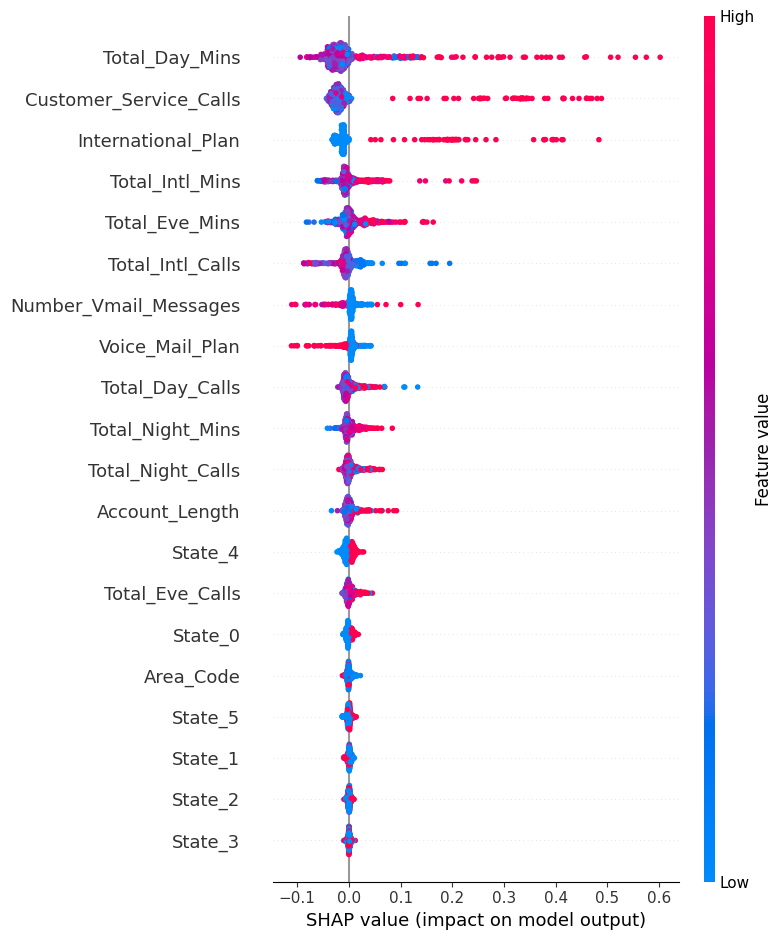

In [ ]:
# Initialize SHAP explainer with the model_predict function
import shap
explainer = shap.Explainer(model_predict, shap.sample(X_train, 100))

# Calculate SHAP values using the explainer
shap_values = explainer(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


**Random Forest SHAP Values:**


> High Influence Features: The SHAP values for Total_Day_Mins and Customer_Service_Calls are again prominent, showing a strong influence on the model's predictions.


> Wider Spread: Compared to the Logistic Regression model, the SHAP values for the Random Forest seem to have a wider spread, indicating a more complex relationship between the features and the prediction.

> Distinctive Patterns: There is a clearer distinction between features that contribute to positive and negative predictions, with some features showing a more pronounced effect in one direction.

**Shap Values for AutoML Model**

In [ ]:
best_model = aml.leader

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

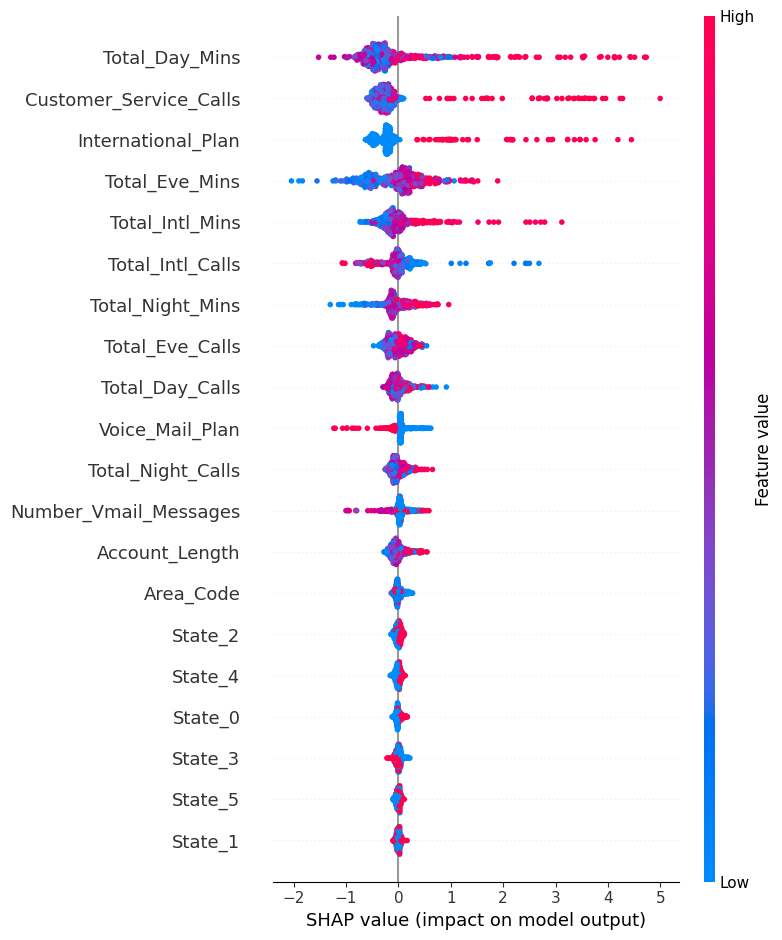

In [ ]:
shap_values_h2o = best_model.predict_contributions(test)
shap_values_df = h2o.as_list(shap_values_h2o)
shap_values_matrix = shap_values_df.iloc[:, :-1].values
feature_matrix = h2o.as_list(test.drop(y, axis=1))
shap.summary_plot(shap_values_matrix, features=feature_matrix, feature_names=test.drop(y, axis=1).columns)

**H2O AutoML SHAP Values:**


> Dominant Features: Similar to the other two models, Total_Day_Mins and Customer_Service_Calls dominate the SHAP values, but with even greater magnitude, particularly for Total_Day_Mins.

> Diverse Impact: The plot suggests a variety of feature impact levels, with some features showing very high SHAP values, indicating a strong prediction influence.

> Spread and Impact: The range of SHAP values is broader, which might reflect the complexity and potentially better performance of the ensemble methods typically chosen by H2O AutoML.

Summary:

- Consistent Influencers: Across all three models, Total_Day_Mins and Customer_Service_Calls consistently appear as highly influential features for predicting churn.
- Model Complexity: The Random Forest and H2O AutoML models show a broader spread of SHAP values compared to the Logistic Regression, likely due to their more complex nature and ability to capture non-linear relationships.
- Impact Directionality: SHAP values provide insights into not just the importance of the features but also the direction of their impact (positive or negative), which is not depicted in traditional feature importance plots.

# Feature Importance

**Feature Importance Plots for Logistic Regression**

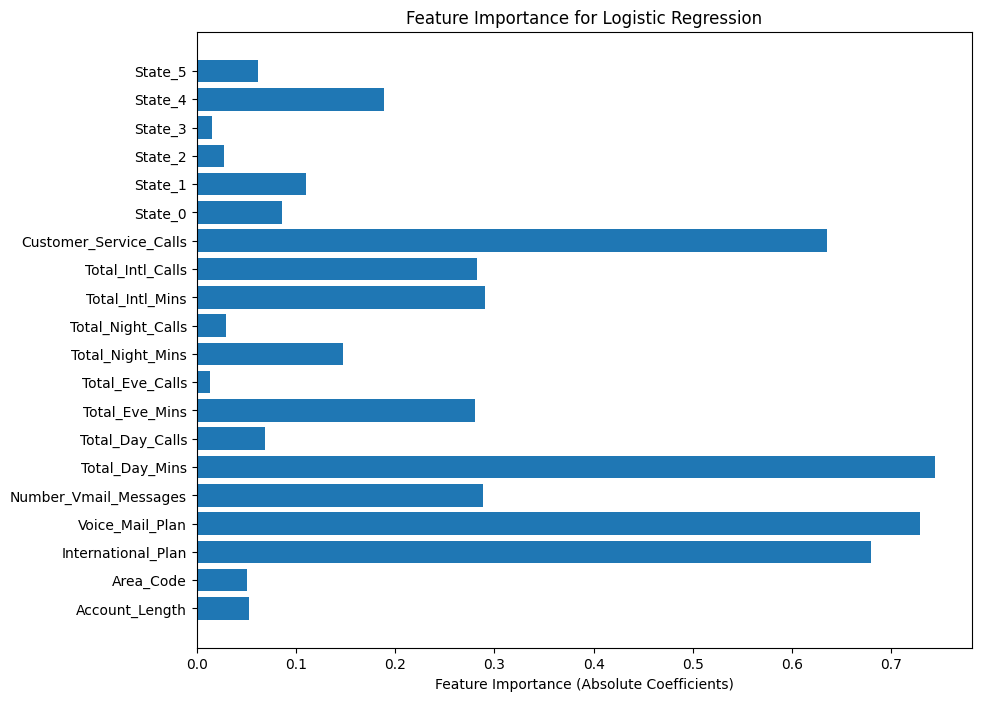

In [ ]:
feature_importance_lr = np.abs(logistic_regression_model.coef_[0])
features = X_train.columns

plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), feature_importance_lr, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.title('Feature Importance for Logistic Regression')
plt.show()

**Logistic Regression Feature Importance:**
- The plot indicates that Account_Length, Area_Code, and International_Plan have the lowest absolute coefficients, suggesting a smaller influence on model predictions.
- Total_Day_Mins stands out with the highest coefficient by a significant margin, which indicates it's a critical predictor in the Logistic Regression model for the target variable.
- Features related to call minutes (Total_Day_Mins, Total_Eve_Mins, Total_Night_Mins, etc.) appear to be more influential than features related to call counts (like Total_Day_Calls).


**Feature Importance Plots for Random Forest Classifier**

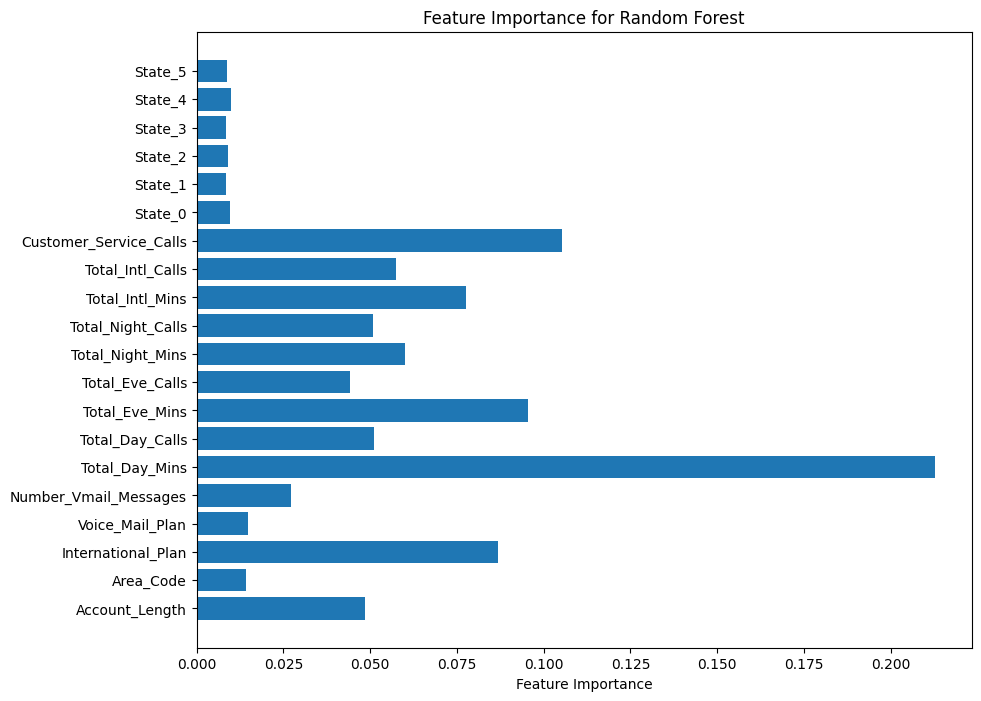

In [ ]:
feature_importance_rf = random_forest.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), feature_importance_rf, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.show()

**Random Forest Feature Importance:**
- Total_Day_Mins also shows the highest importance in the Random Forest model, consistent with its significance in the Logistic Regression model.
- The feature importance values are more evenly distributed compared to Logistic Regression, which could suggest that the Random Forest model relies on a broader combination of features.
- Customer_Service_Calls appears to be highly important as well, although less so than Total_Day_Mins.

**Feature Importance Plots for AutoMl H2O Model**

In [ ]:
best_model = aml.leader

# Extracting feature importance
feature_importance = best_model.varimp(use_pandas=True)


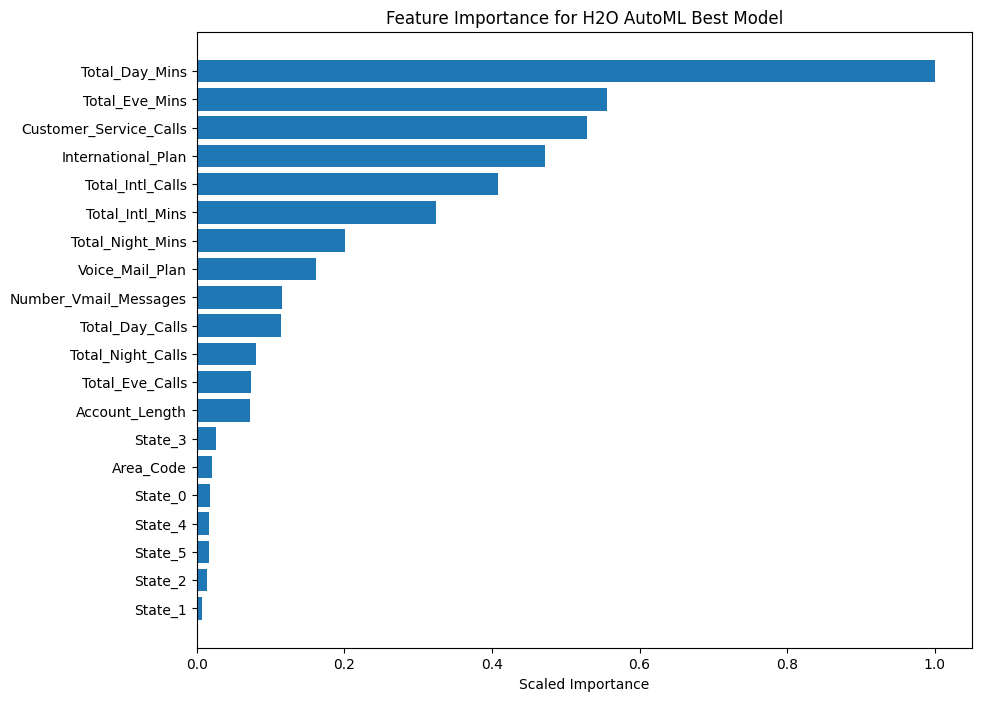

In [ ]:
feature_importance_sorted = feature_importance.sort_values(by='scaled_importance', ascending=True)

# Creating the plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_sorted['variable'], feature_importance_sorted['scaled_importance'])
plt.xlabel('Scaled Importance')
plt.title('Feature Importance for H2O AutoML Best Model')
plt.show()


**H2O AutoML Best Model Feature Importance:**
- Similar to the other models, Total_Day_Mins has the highest importance, indicating its significance across different modeling approaches.
- There is a substantial drop-off in importance after the top few features, suggesting that the H2O AutoML best model may be relying heavily on a few key features.
- The scaled importance scores provide a normalized view, with the most important feature set to a score of 1, and all other scores are relative to this.

**Summary:**
- Across all three models, Total_Day_Mins consistently emerges as the most important feature, underscoring its strong predictive power.
The relative importance of other features varies between models, which reflects the different ways each modeling approach processes features and captures relationships in the data.
- The Logistic Regression model shows a more significant drop in coefficient magnitude after the most important feature, indicating potential reliance on a single predictor.
- In contrast, Random Forest and H2O AutoML display a smoother gradient, suggesting a more balanced use of the various features.
- The state features (State_0, State_1, etc.) appear at different ranks in all models, suggesting they might not have a consistent predictive influence and their importance might be model-dependent.


 The feature importance plots provide a global perspective on which features are deemed significant by each model and confirm that **Total_Day_Mins** is a **key predictor** for churn across all models.




# Partial Dependence Plots

In [ ]:
!pip install scikit-learn==1.1.1

In [ ]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


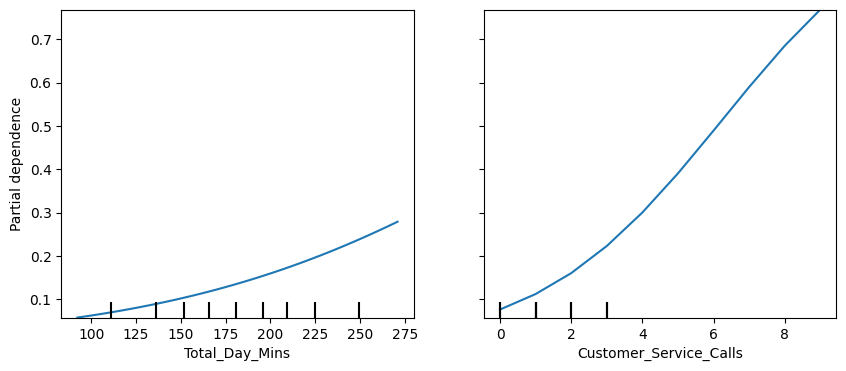

In [ ]:
# When fitting the model, make sure to use a DataFrame with feature names
logistic_regression_model.fit(X_train, y_train)

# When calling plot_partial_dependence, also make sure X_train has feature names
fig, ax = plt.subplots(figsize=(10, 4))
plot_partial_dependence(logistic_regression_model, X_train, features=['Total_Day_Mins', 'Customer_Service_Calls'], ax=ax)
plt.show()


**Logistic Regression PDPs:**
- Total_Day_Mins: The relationship shown by Logistic Regression is usually more linear or logistic in nature, reflecting the linear assumptions of the model. The plot might show a steady increase in the target probability as daily minutes increase, without the sharp changes that might be evident in the Random Forest PDP.
- Customer_Service_Calls: Similarly, the effect of customer service calls is likely to increase the probability of the target event more smoothly, without the distinct thresholds observed in tree-based models like Random Forest.

**PDPs for Random Forest Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


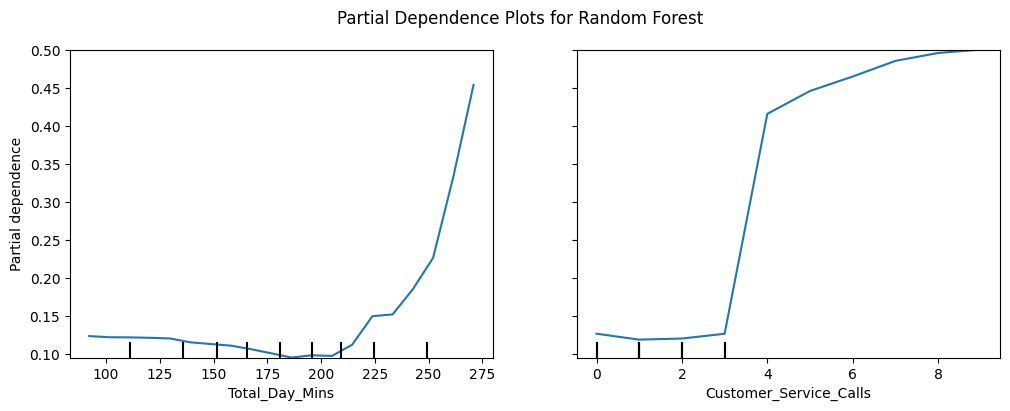

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(random_forest, X_train, features=features, ax=ax, grid_resolution=20)
plt.suptitle("Partial Dependence Plots for Random Forest")
plt.show()


**Random Forest PDPs:**
- Total_Day_Mins: The PDP likely shows a non-linear relationship, with the prediction increasing sharply after a certain threshold of minutes. This suggests that the Random Forest model has captured complex interactions that increase the likelihood of the target event (e.g., churn) as daily usage increases past a certain point.
- Customer_Service_Calls: There may be a stepwise increase in the likelihood of the target event as the number of customer service calls increases. It often indicates that after a certain number of calls, the prediction for churn sharply increases, reflecting a threshold effect captured by the Random Forest model.

**PDPs for AutoML H2O Model:**

In [ ]:
features_for_pdp = ['Total_Day_Mins', 'Customer_Service_Calls']

PartialDependencePlot progress: |

<ipython-input-52-1d3c38335bf5>:2: H2ODeprecationWarning: ``data`` param of ``ModelBase.partial_plot`` is deprecated, please use ``frame`` instead.
  pdp = best_model.partial_plot(data=train, cols=[feature], plot=True, nbins=20)


████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


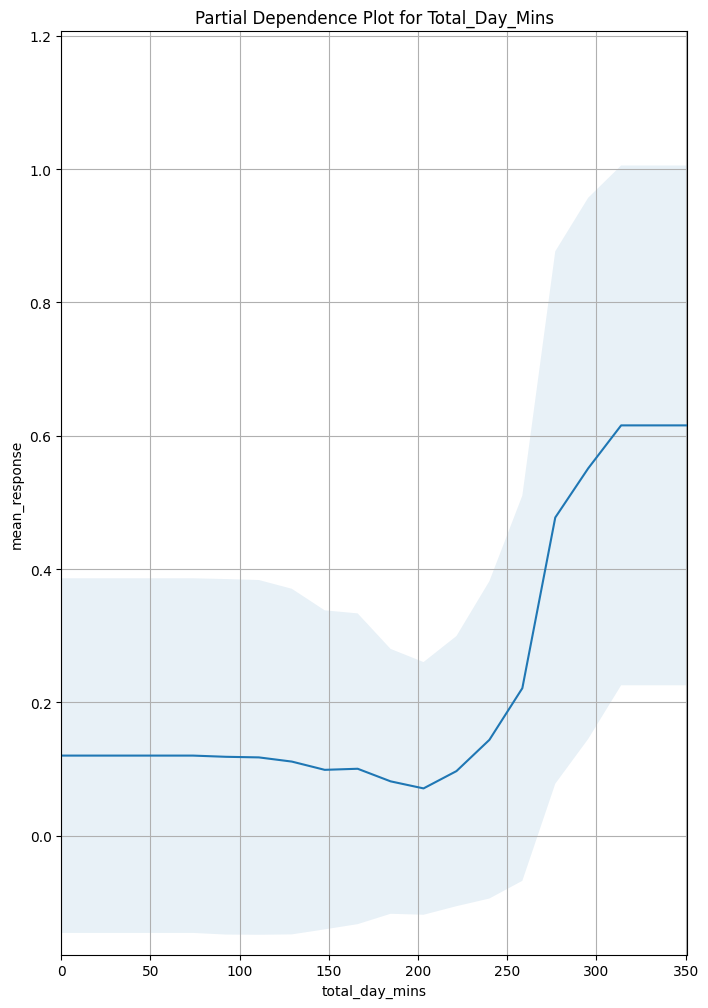

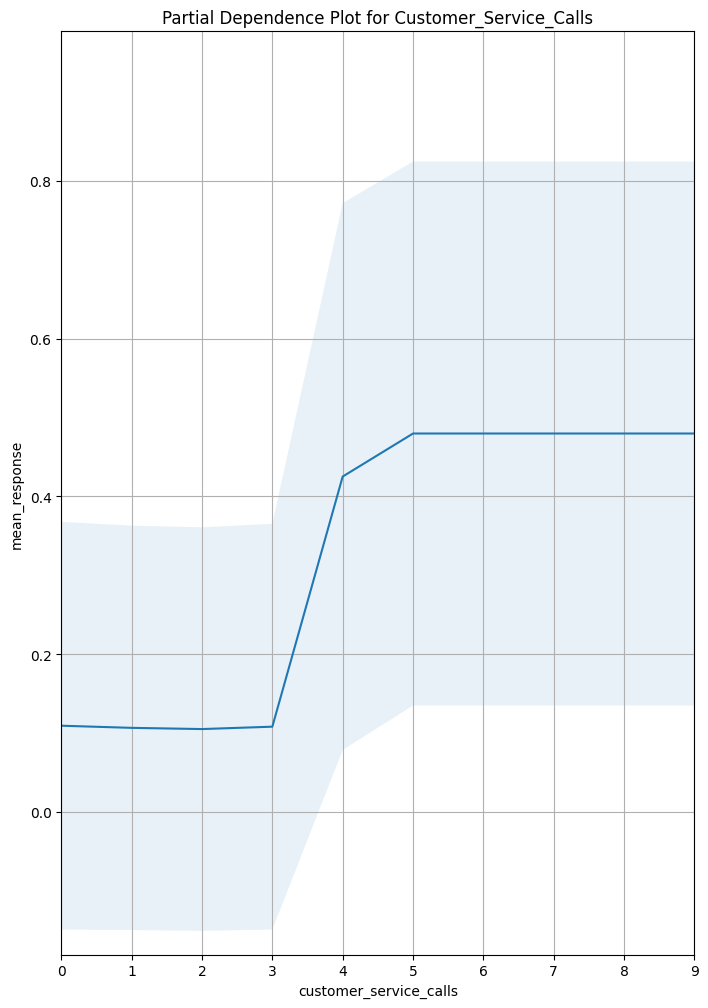

In [ ]:
for feature in features_for_pdp:
    pdp = best_model.partial_plot(data=train, cols=[feature], plot=True, nbins=20)


**H2O AutoML PDPs:**
- Total_Day_Mins and Customer_Service_Calls: Since H2O AutoML often selects a complex ensemble model, the PDPs could show a blend of linear and non-linear effects. The AutoML model may reveal more nuanced interactions and thresholds similar to the Random Forest but potentially even more complex due to the ensemble nature of the model.

Summary:

- Random Forest vs. Logistic Regression: The Random Forest model is likely to capture more complex and potentially non-linear interactions between the features and the target variable compared to the Logistic Regression model.

- Random Forest vs. H2O AutoML: The Random Forest PDPs may show more pronounced effects and thresholds due to its tree-based nature, while the H2O AutoML's PDPs may reflect an even more intricate relationship due to the combination of various models and algorithms.
- Logistic Regression vs. H2O AutoML: Logistic Regression PDPs generally reflect a more straightforward, linear relationship, whereas H2O AutoML's PDPs can capture a richer set of patterns depending on the specific algorithms included in the ensemble.

**PDP**s are useful for visualizing and understanding the general effect of one or two features on the predicted outcome across the whole dataset. They provide a high-level view of the model's behavior but lack the granularity and specificity of SHAP values.

**SHAP Values** offer detailed, granular insights at both global and local levels, showing the contribution and direction of each feature's effect on individual predictions.

**Feature Importance Plots** provide a high-level overview of which features are most influential on the model's predictions overall but do not show how different feature values impact the prediction.

# **References**

References :
1. Kaggle Dataset - Telecom Churn Dataset: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets
2.sklearn.ensemble.RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. Random Forest Algorithm Clearly Explained!: https://www.youtube.com/watch?v=v6VJ2RO66Ag
4. ChatGPT: https://chat.openai.com/auth/login?sso
5. YouTube/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb
6. YouTube/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
7. Imputation Methods for Missing Data: https://www.youtube.com/watch?v=fYhr8eF1ubo
8. Comprehensive data exploration with Python: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook
9. Exploratory Data Analysis with Pandas Python 2023: https://www.youtube.com/watch?v=xi0vhXFPegw&t=1181s

10. H2o Documentation: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
11. The shap values with h2o models:
https://medium.com/dataman-in-ai/the-shap-values-with-h2o-models-773a203b75e3
12. A Crash Course in Statistical Learning AutoML - AutoML Wine Quality:
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb
13. A Crash Course in Statistical Learning AutoML - AutoML Smoke Detection Example: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

14. Introduction to shap-values machine learning interpretability: https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability
15. Model Interpretability: https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb
16. Shap issues: https://github.com/shap/shap/issues/1252#issuecomment-857469497
17. Shap issues: https://github.com/shap/shap/issues/14
18. Understanding partial dependence plots - pdps: https://medium.com/data-science-in-your-pocket/understanding-partial-dependence-plots-pdps-415346b7e7f1
19. How to use shap kernal: https://datascience.stackexchange.com/questions/52476/how-to-use-shap-kernal-explainer-with-pipeline-models
20. Explaining random forest model with shapely values: https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values


# **License**

MIT License

Copyright (c) 2024 Anusree Mohanan

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.